**STEP-1**
- IMPORT THE TREQUIRED PACKAGES

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**SETP-2**
- READ THE DATA

In [19]:
# My data file and python files is in same location
# So no need to provide full path
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Data Preprocessing Part 1

In [20]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [21]:
df.shape

# No of rows are 7043
# No of columns are 38

(7043, 38)

In [22]:
# Customer_ID and Zip code are just a ID 
# so that we can drop these columns

In [23]:
# Drop identifier column
df.drop(columns = ['Customer ID', 'Zip Code'], inplace=True)
df.shape

(7043, 36)

In [24]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Gender                       2
Married                      2
City                      1106
Offer                        5
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                3
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Customer Status              3
Churn Category               5
Churn Reason                20
dtype: int64

In [25]:
# Drop city column because it have alot of unique value
# More splitters the model become overfit
df.drop(columns = 'City', 
          inplace=True)
df.shape

(7043, 35)

# Exploratory Data Analysis

In [26]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
len(cat_vars)

# There are 21 cat columns are there

21

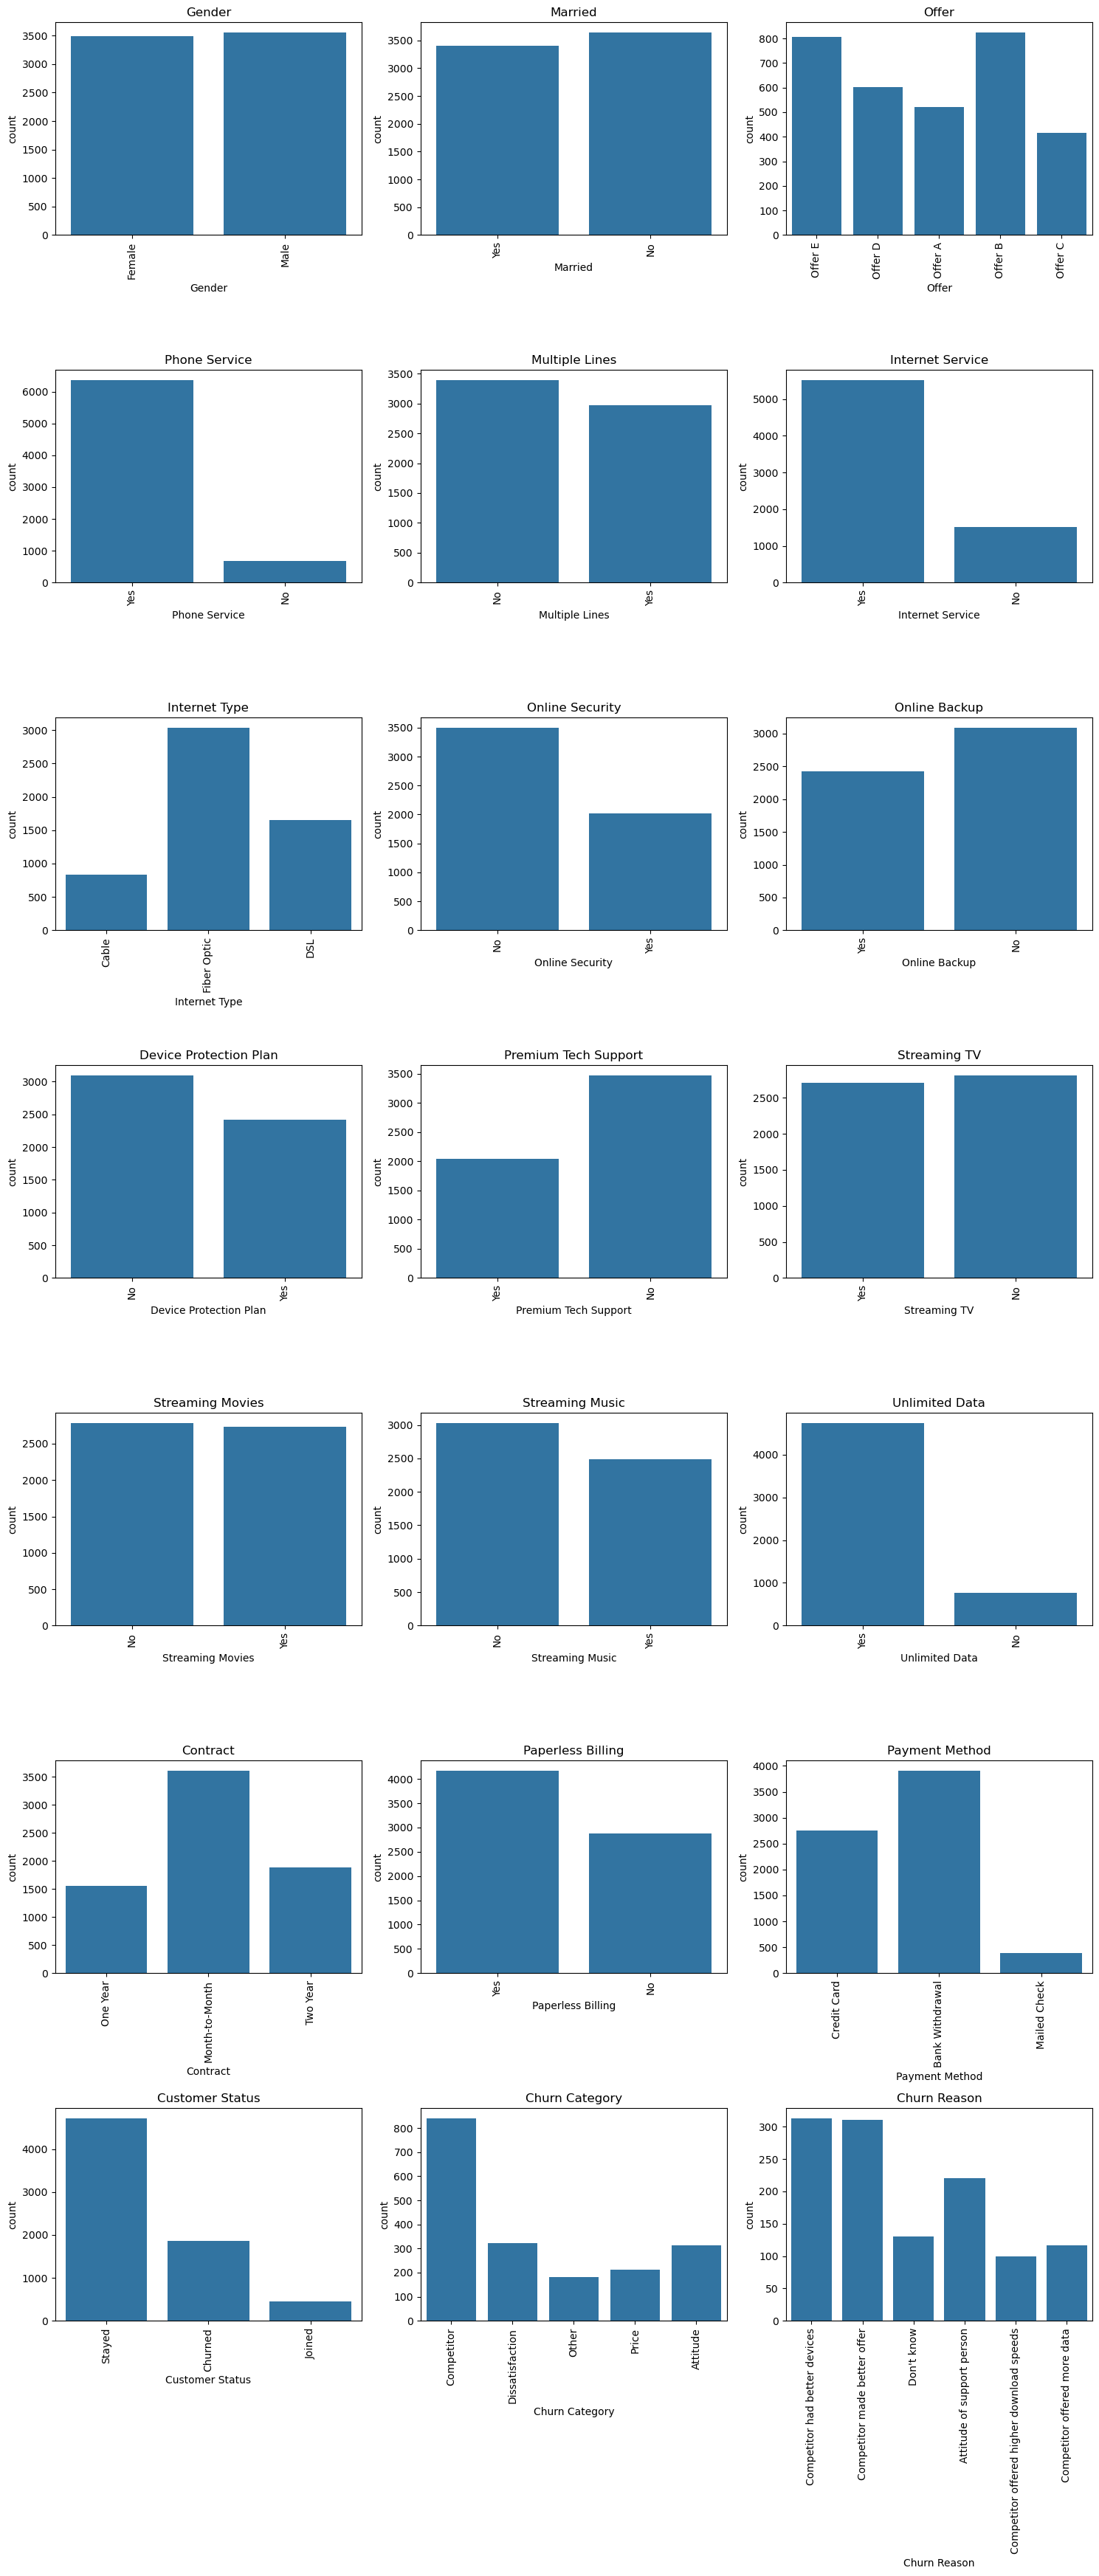

In [27]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

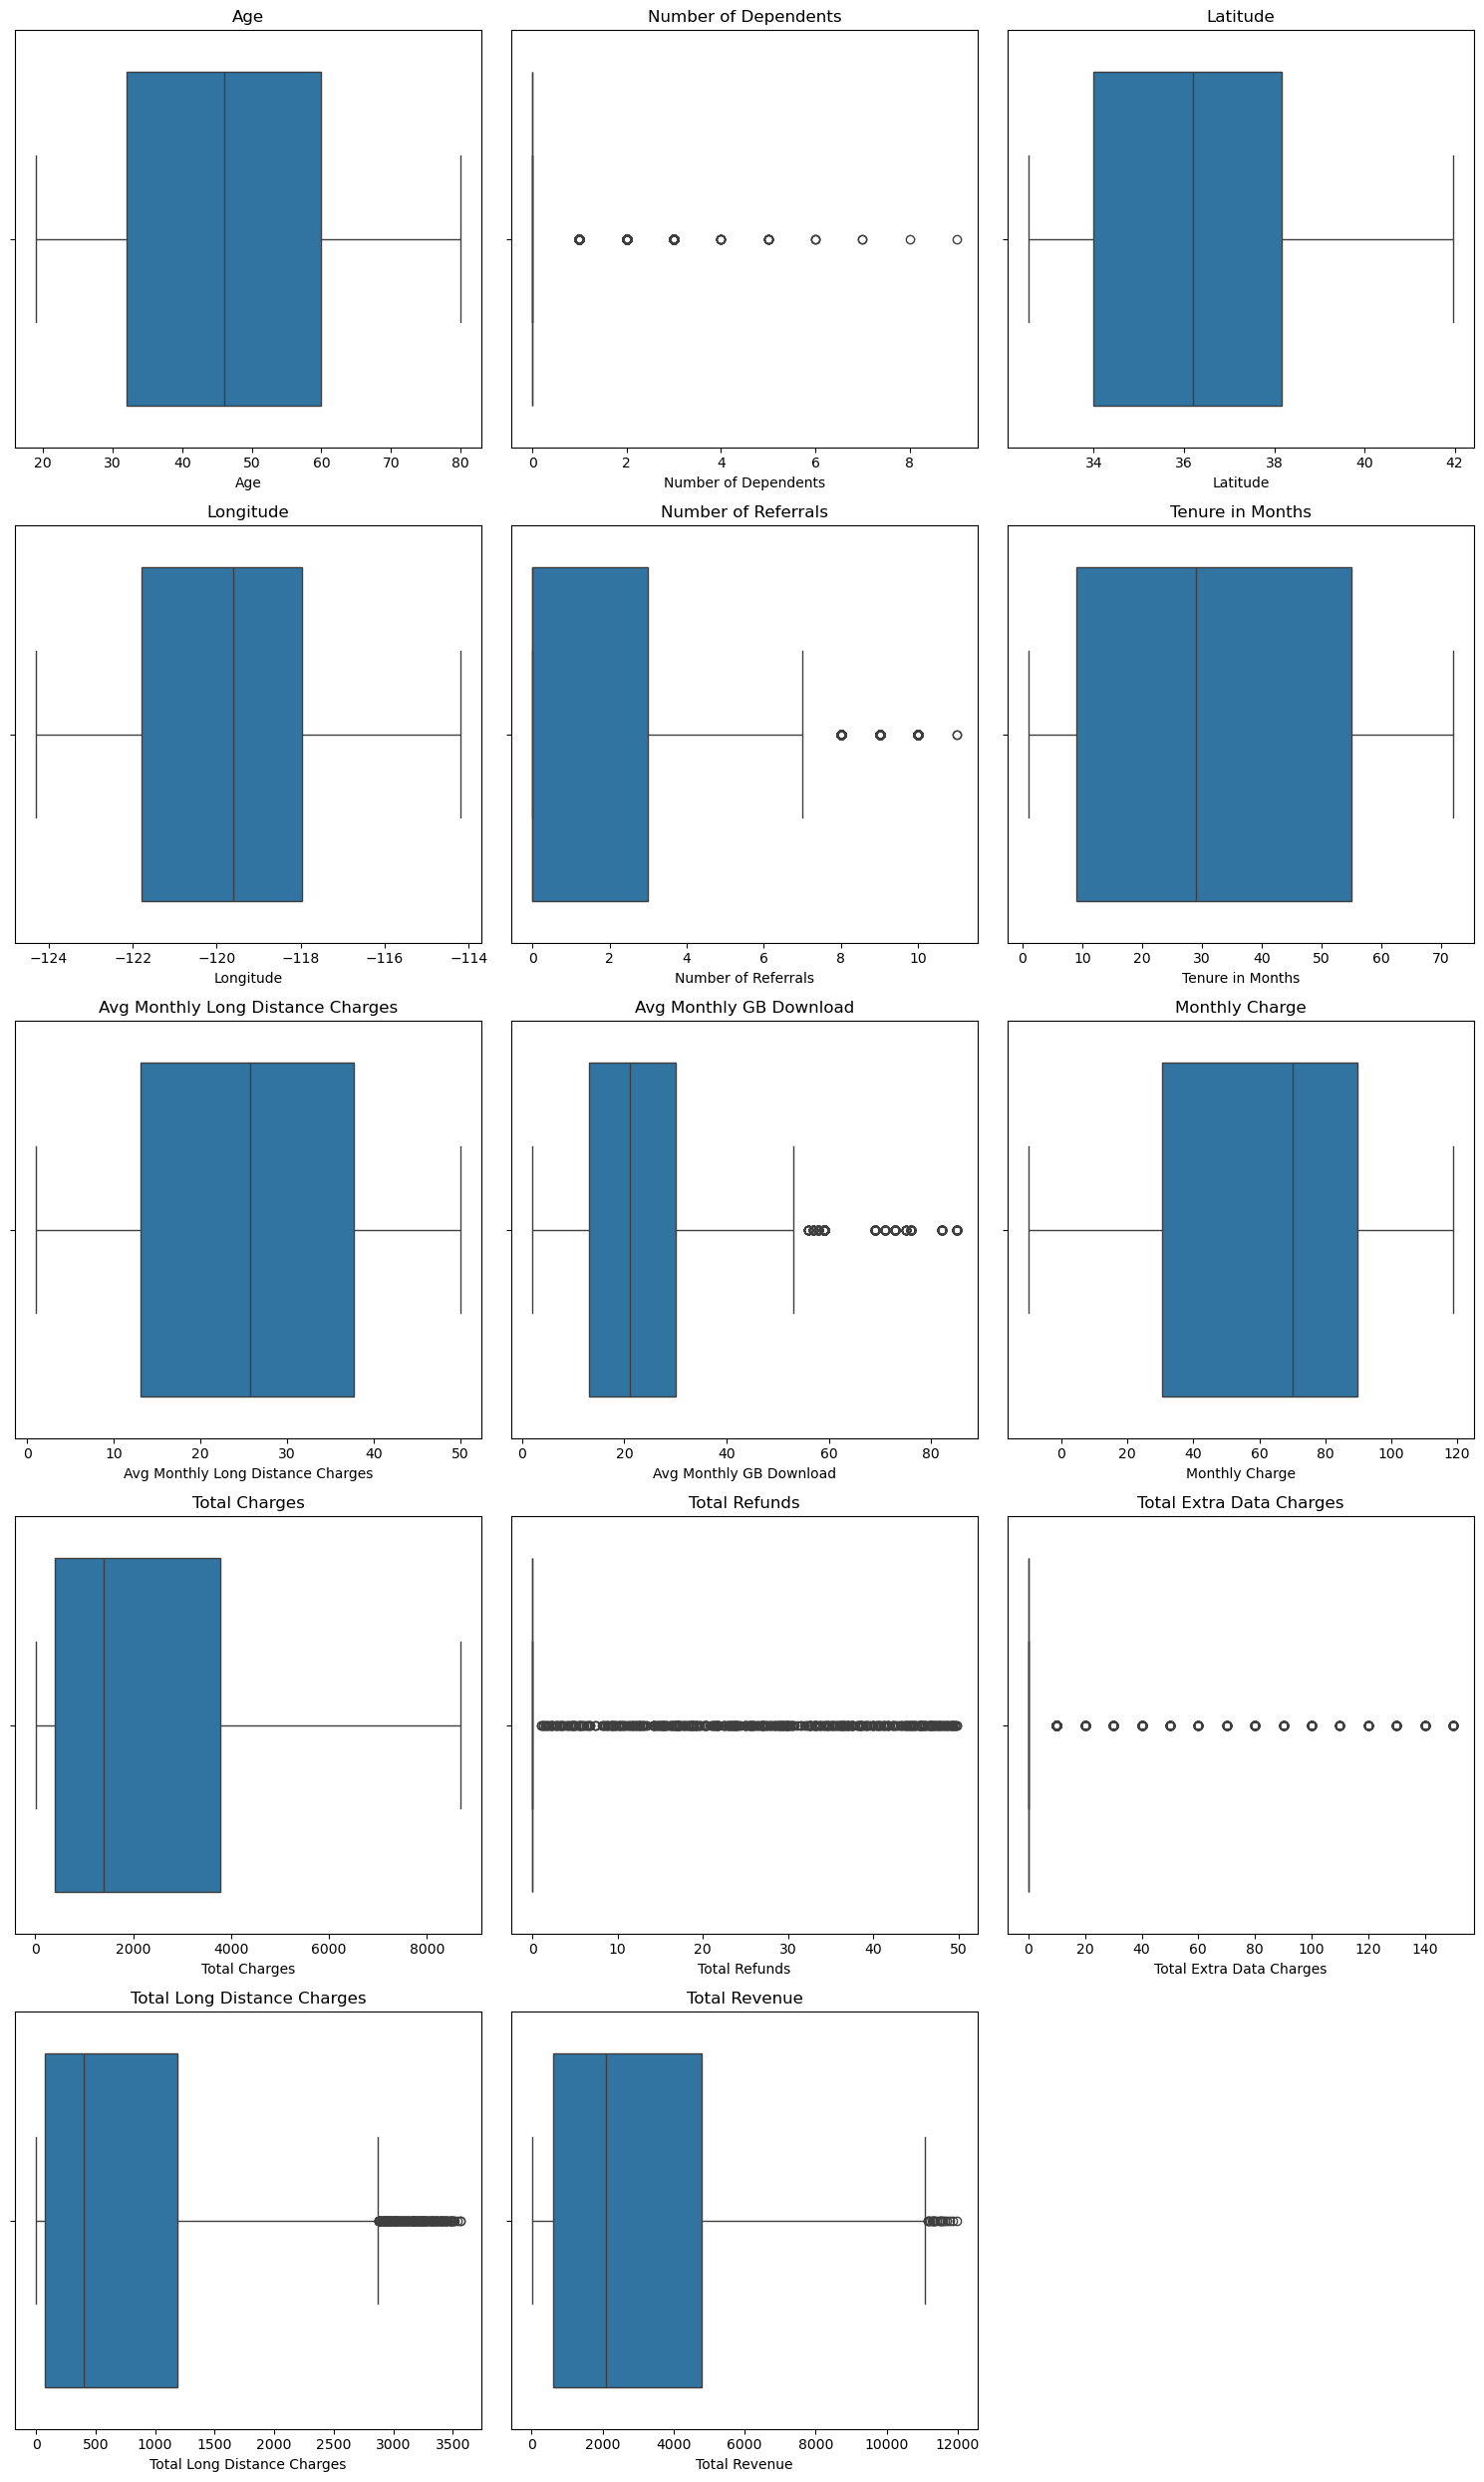

In [28]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

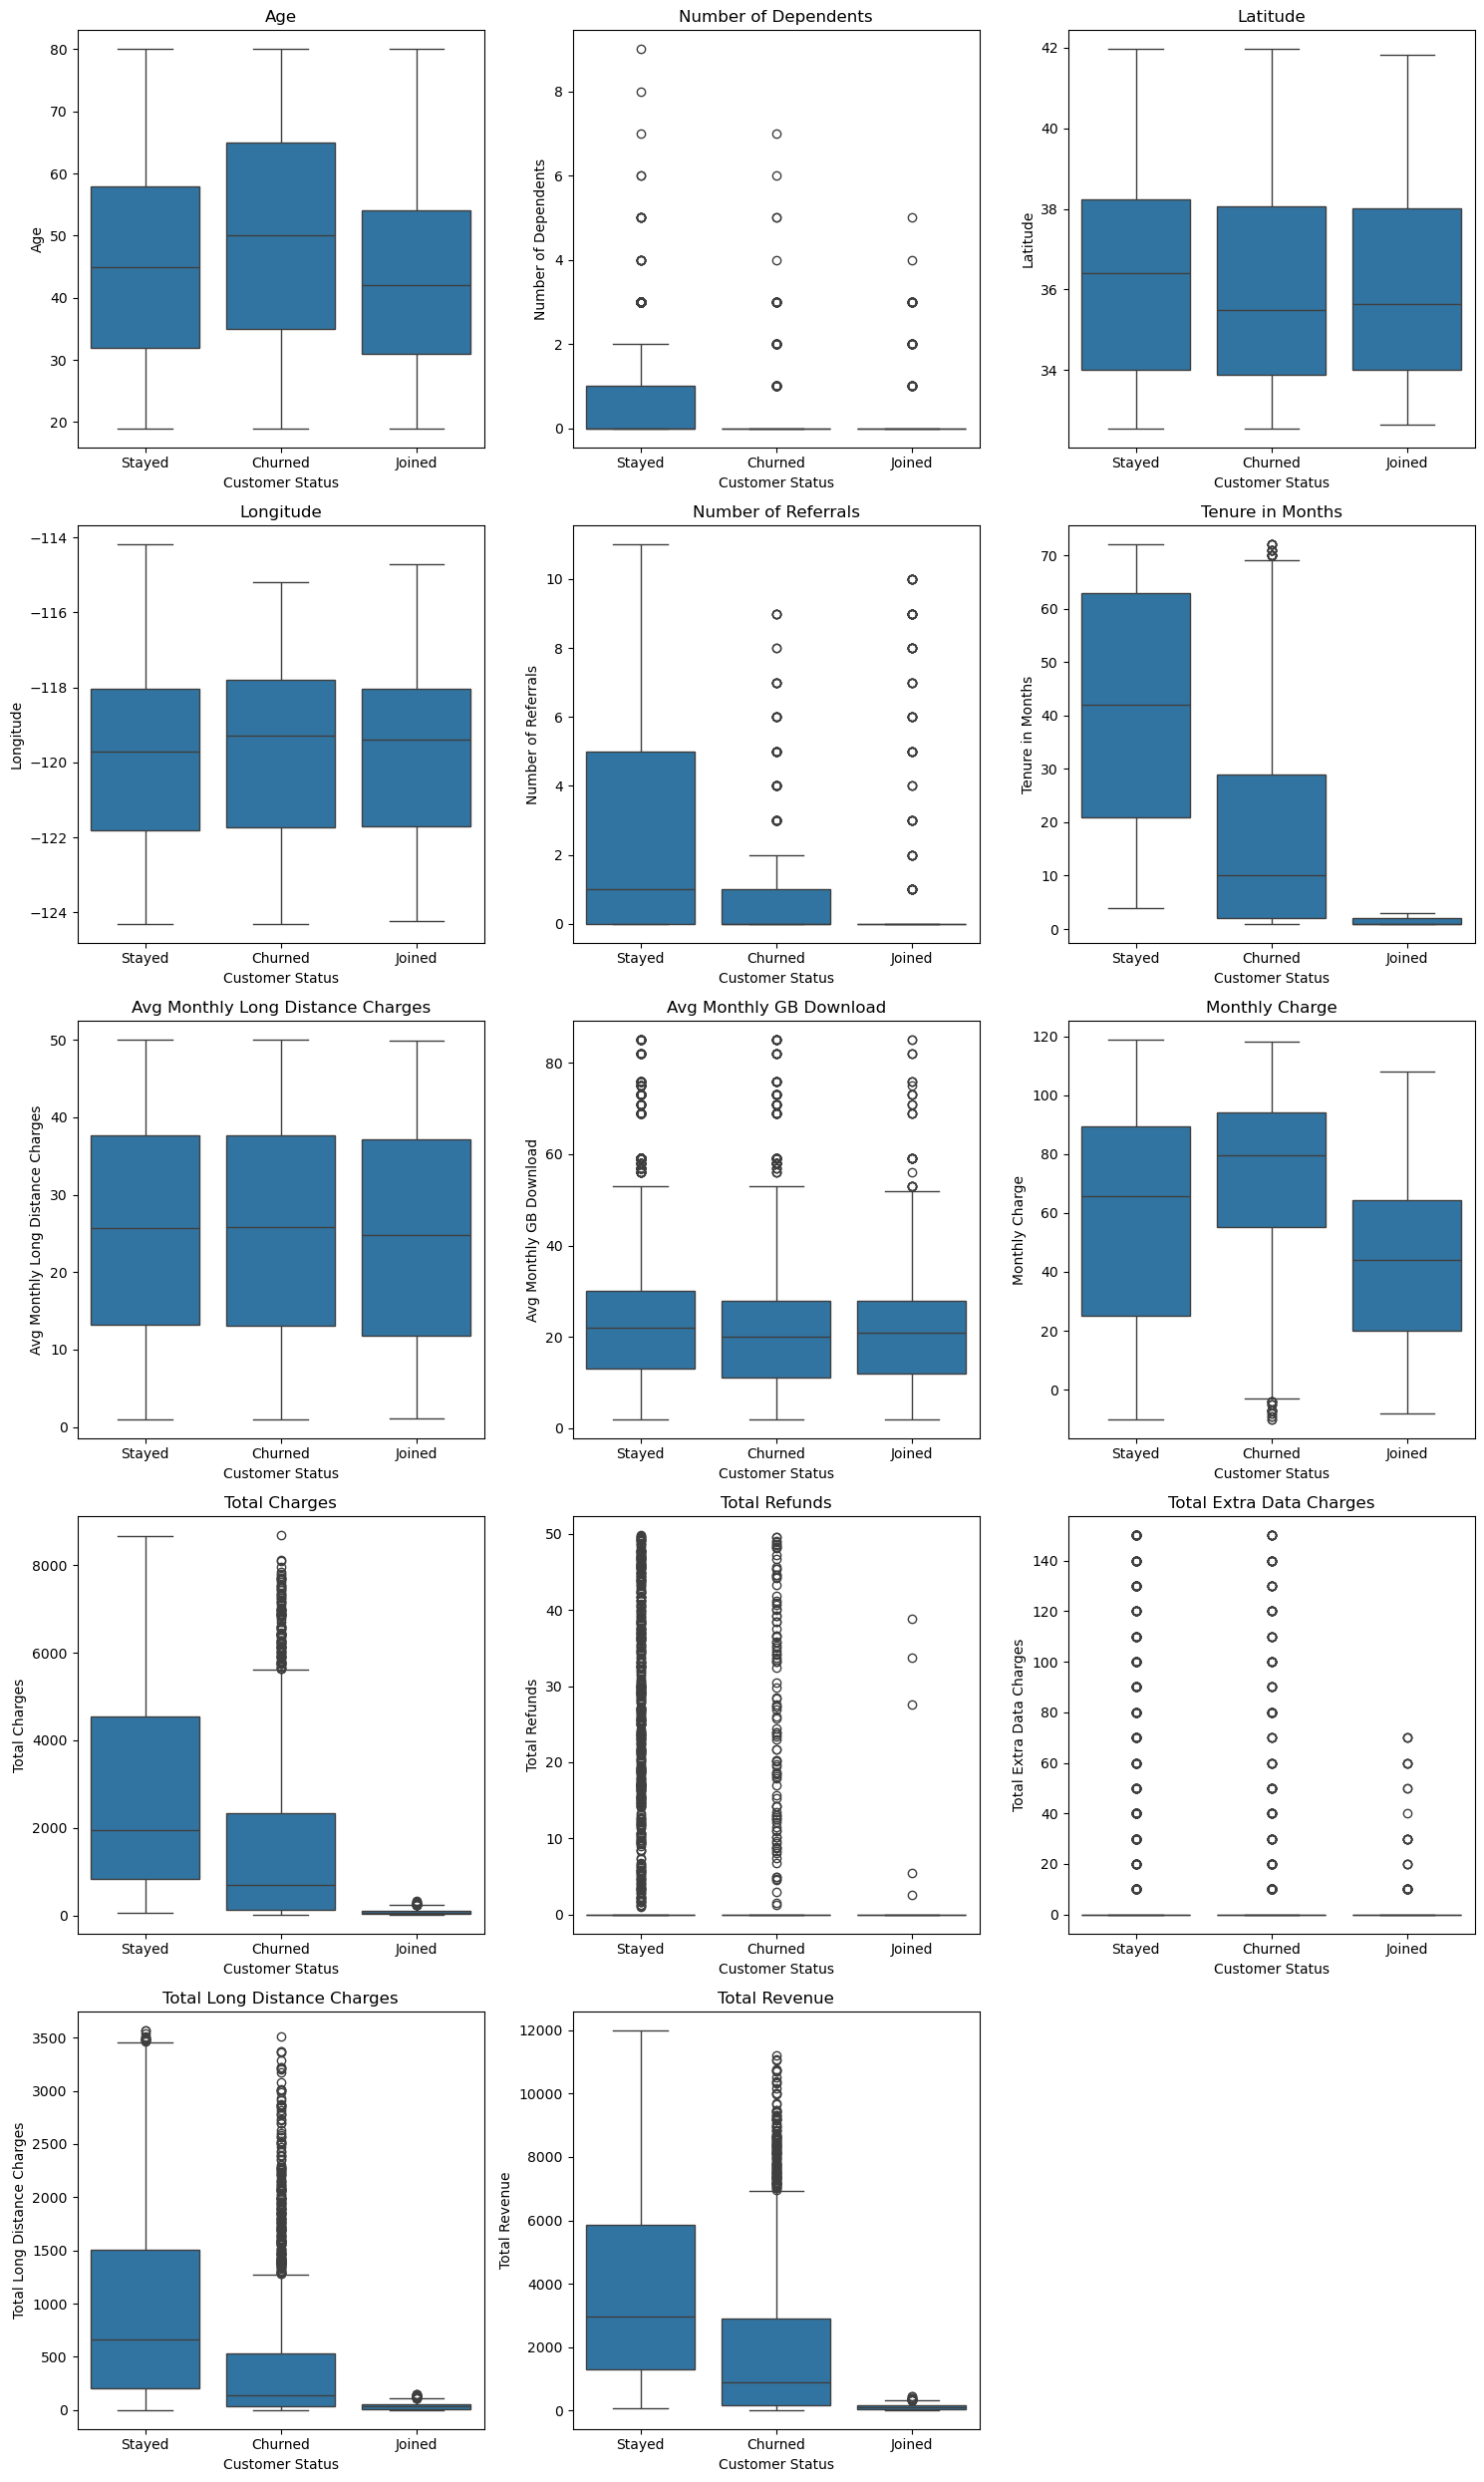

In [29]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Customer Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

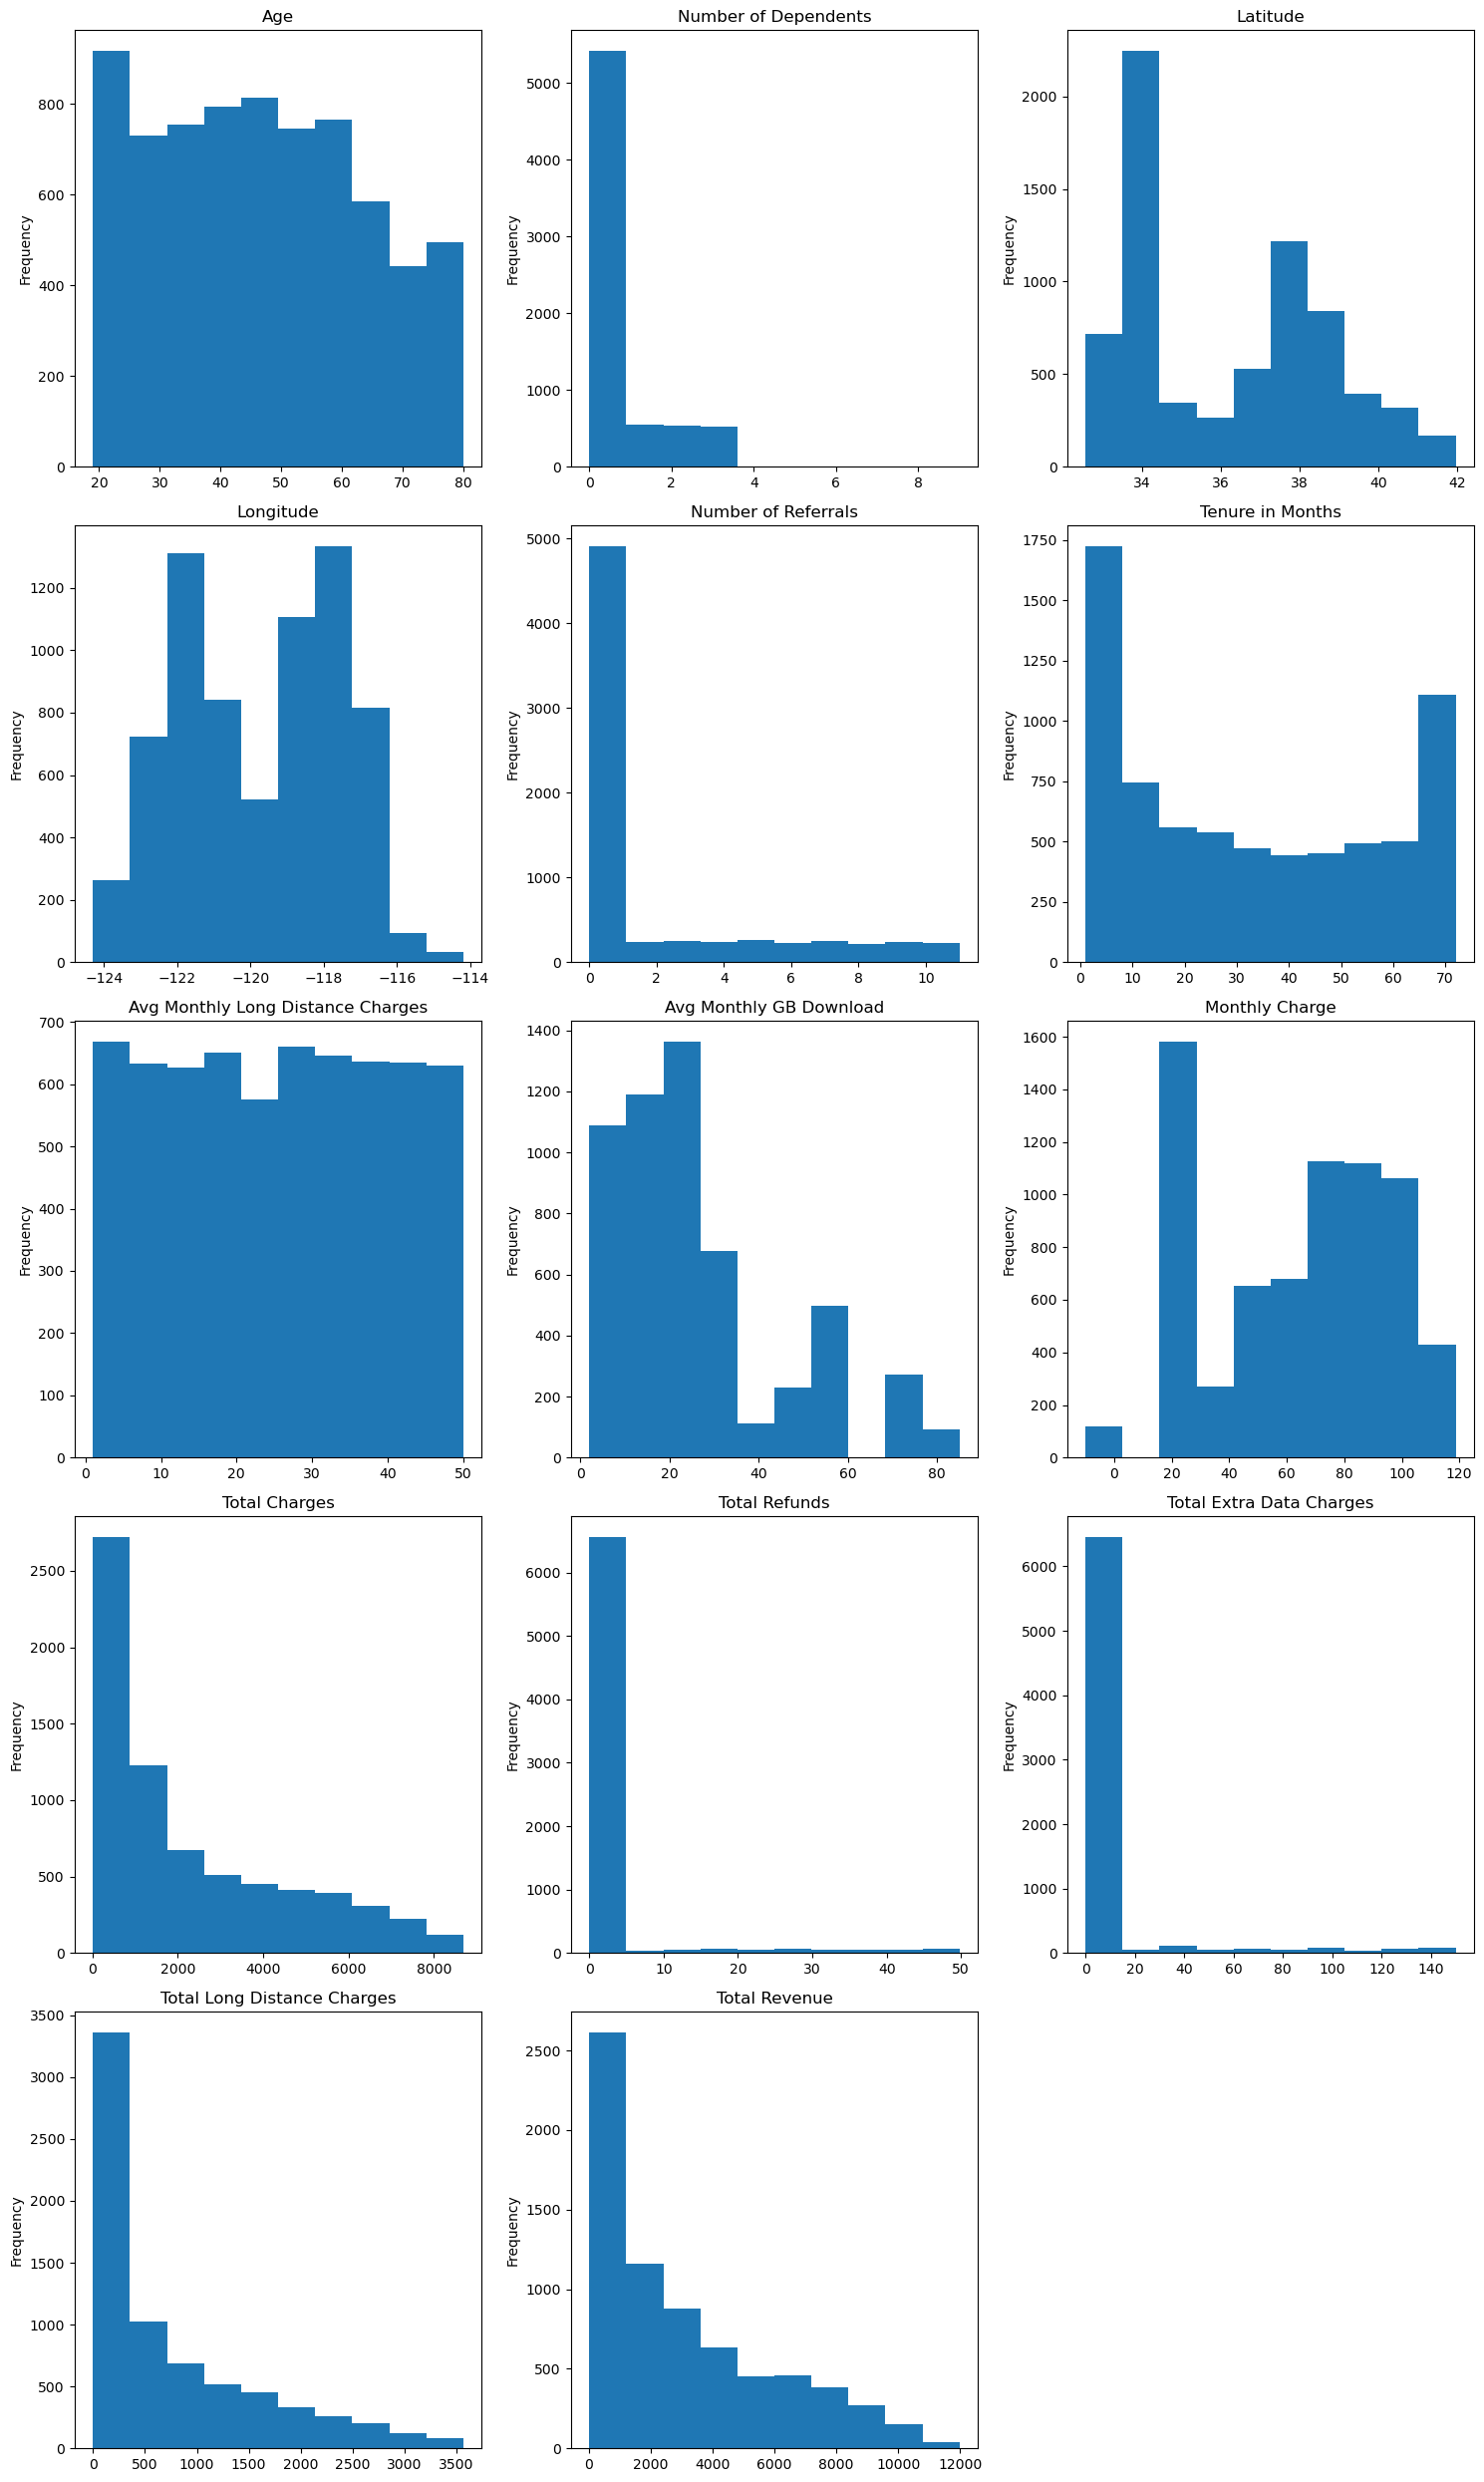

In [30]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [31]:
# Customer_status:
# Stayed
# Joined
# Churned

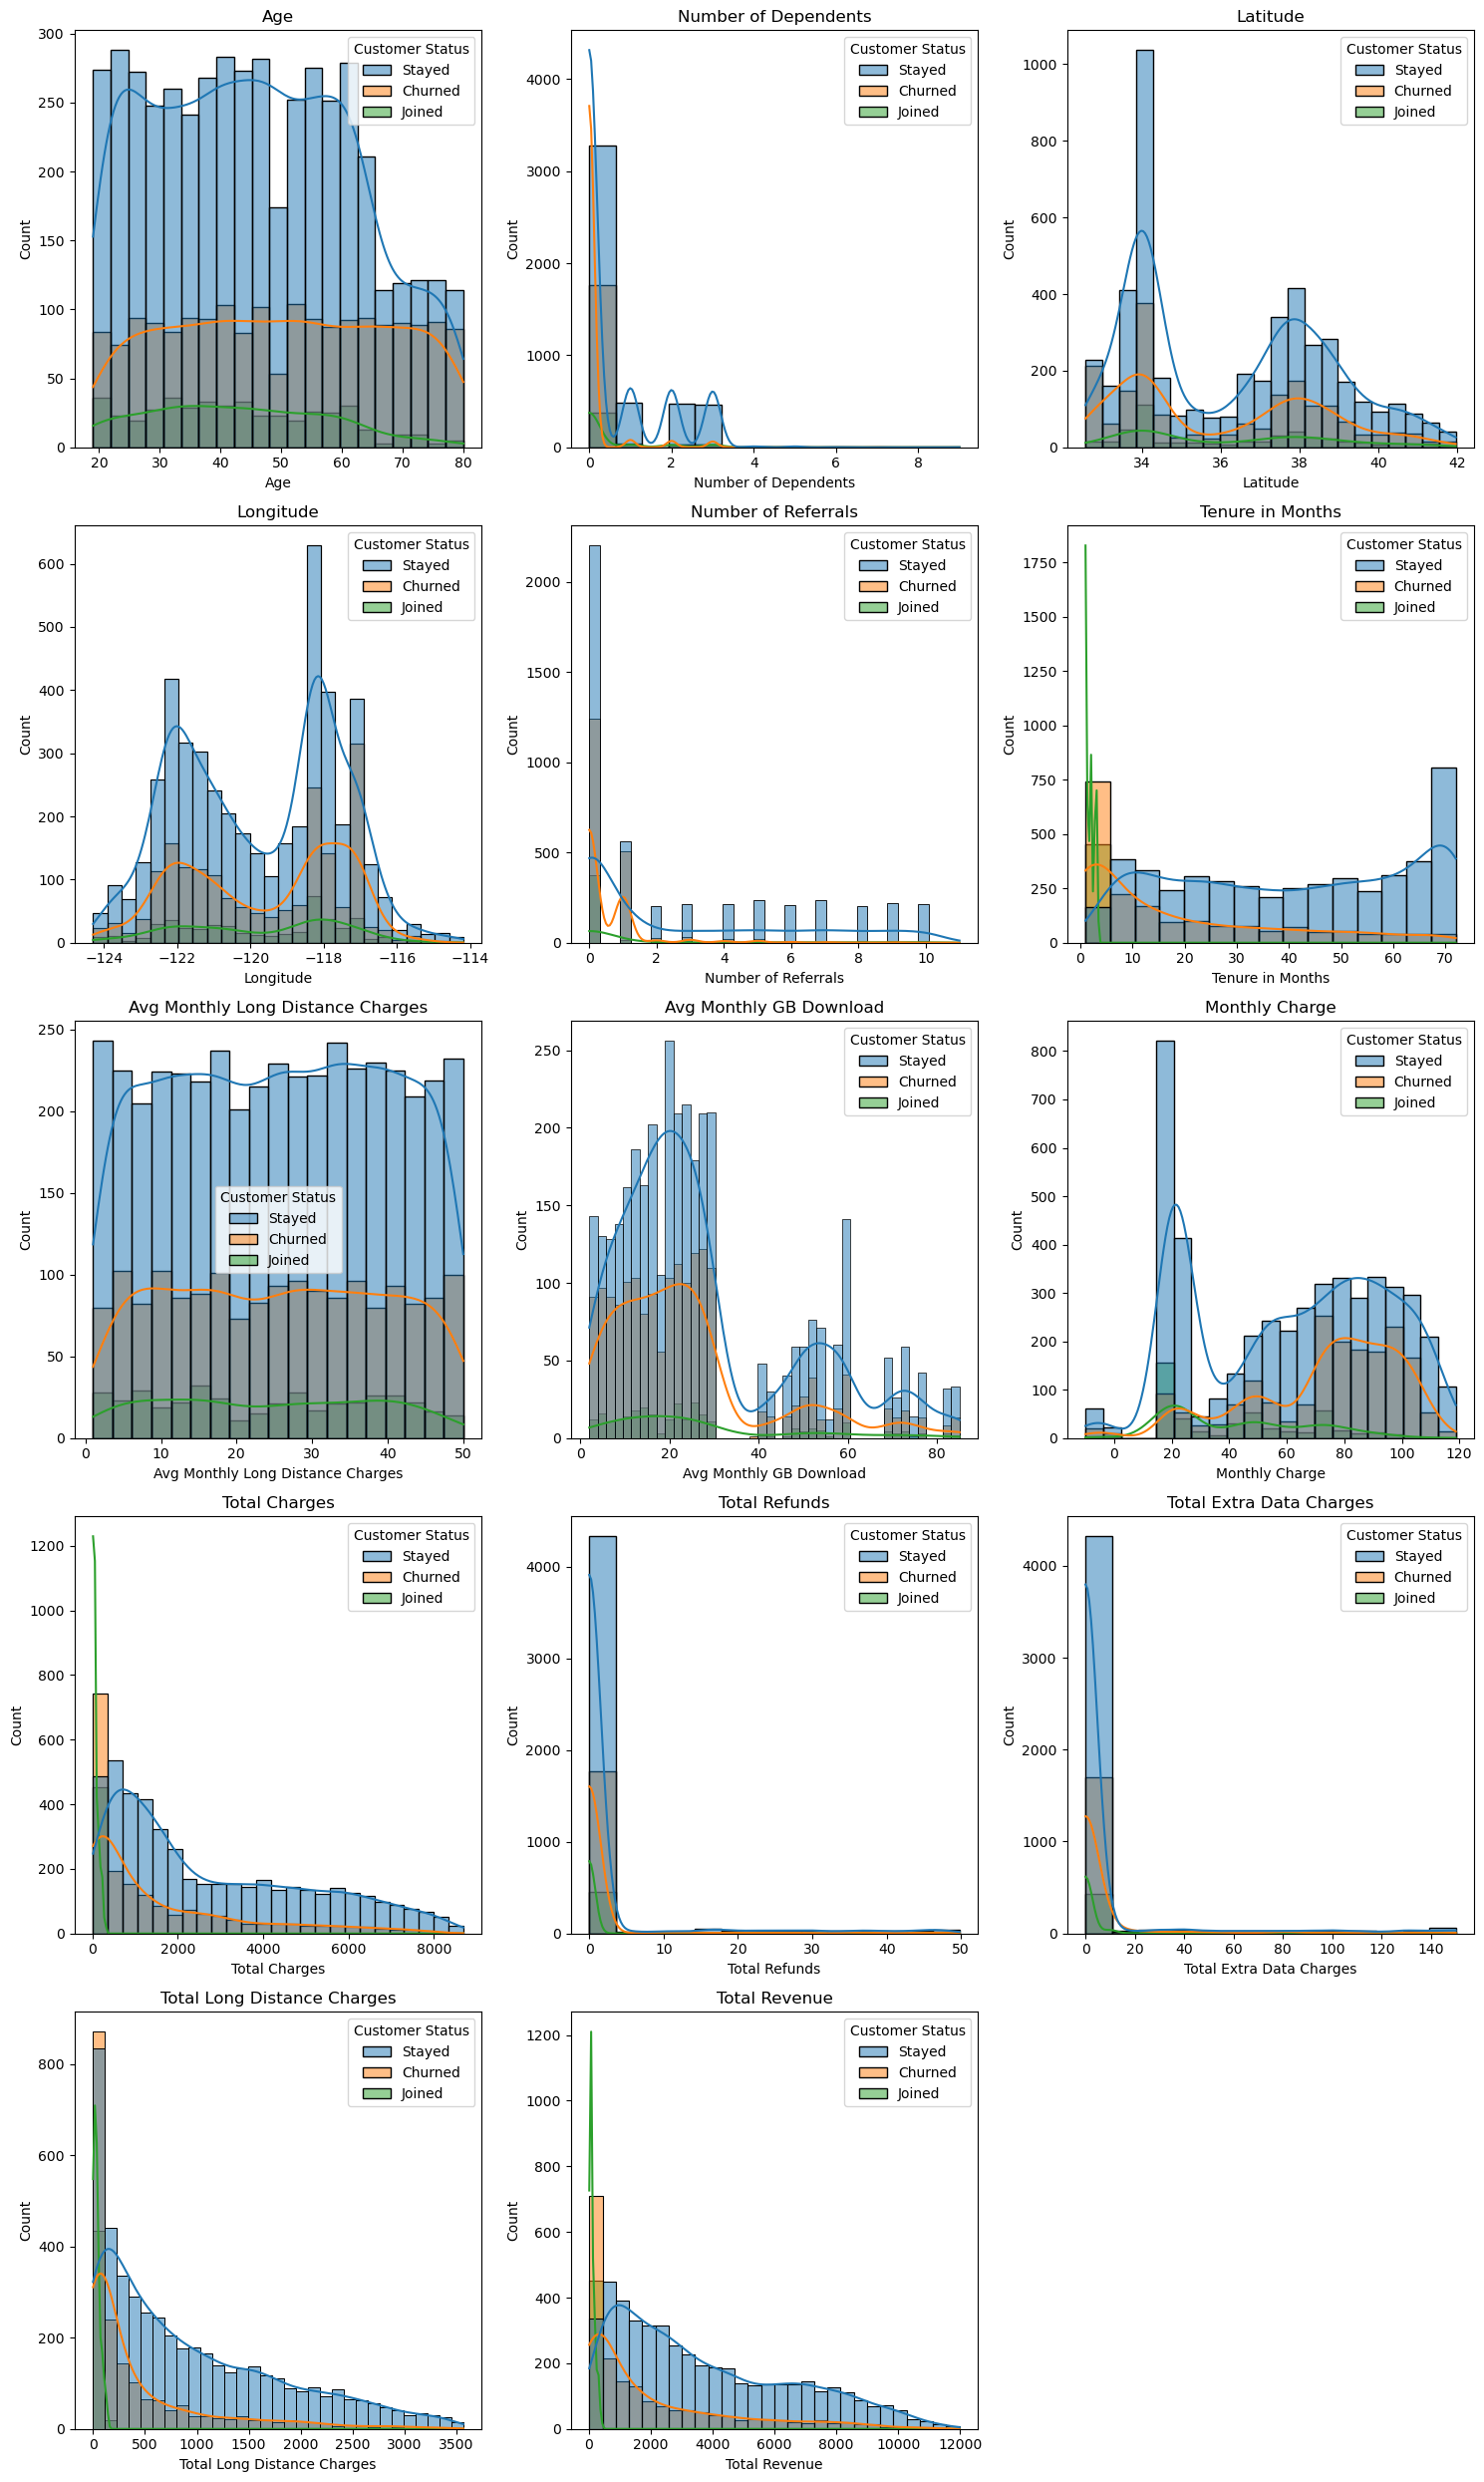

In [32]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, 
                 hue='Customer Status',kde='True',ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

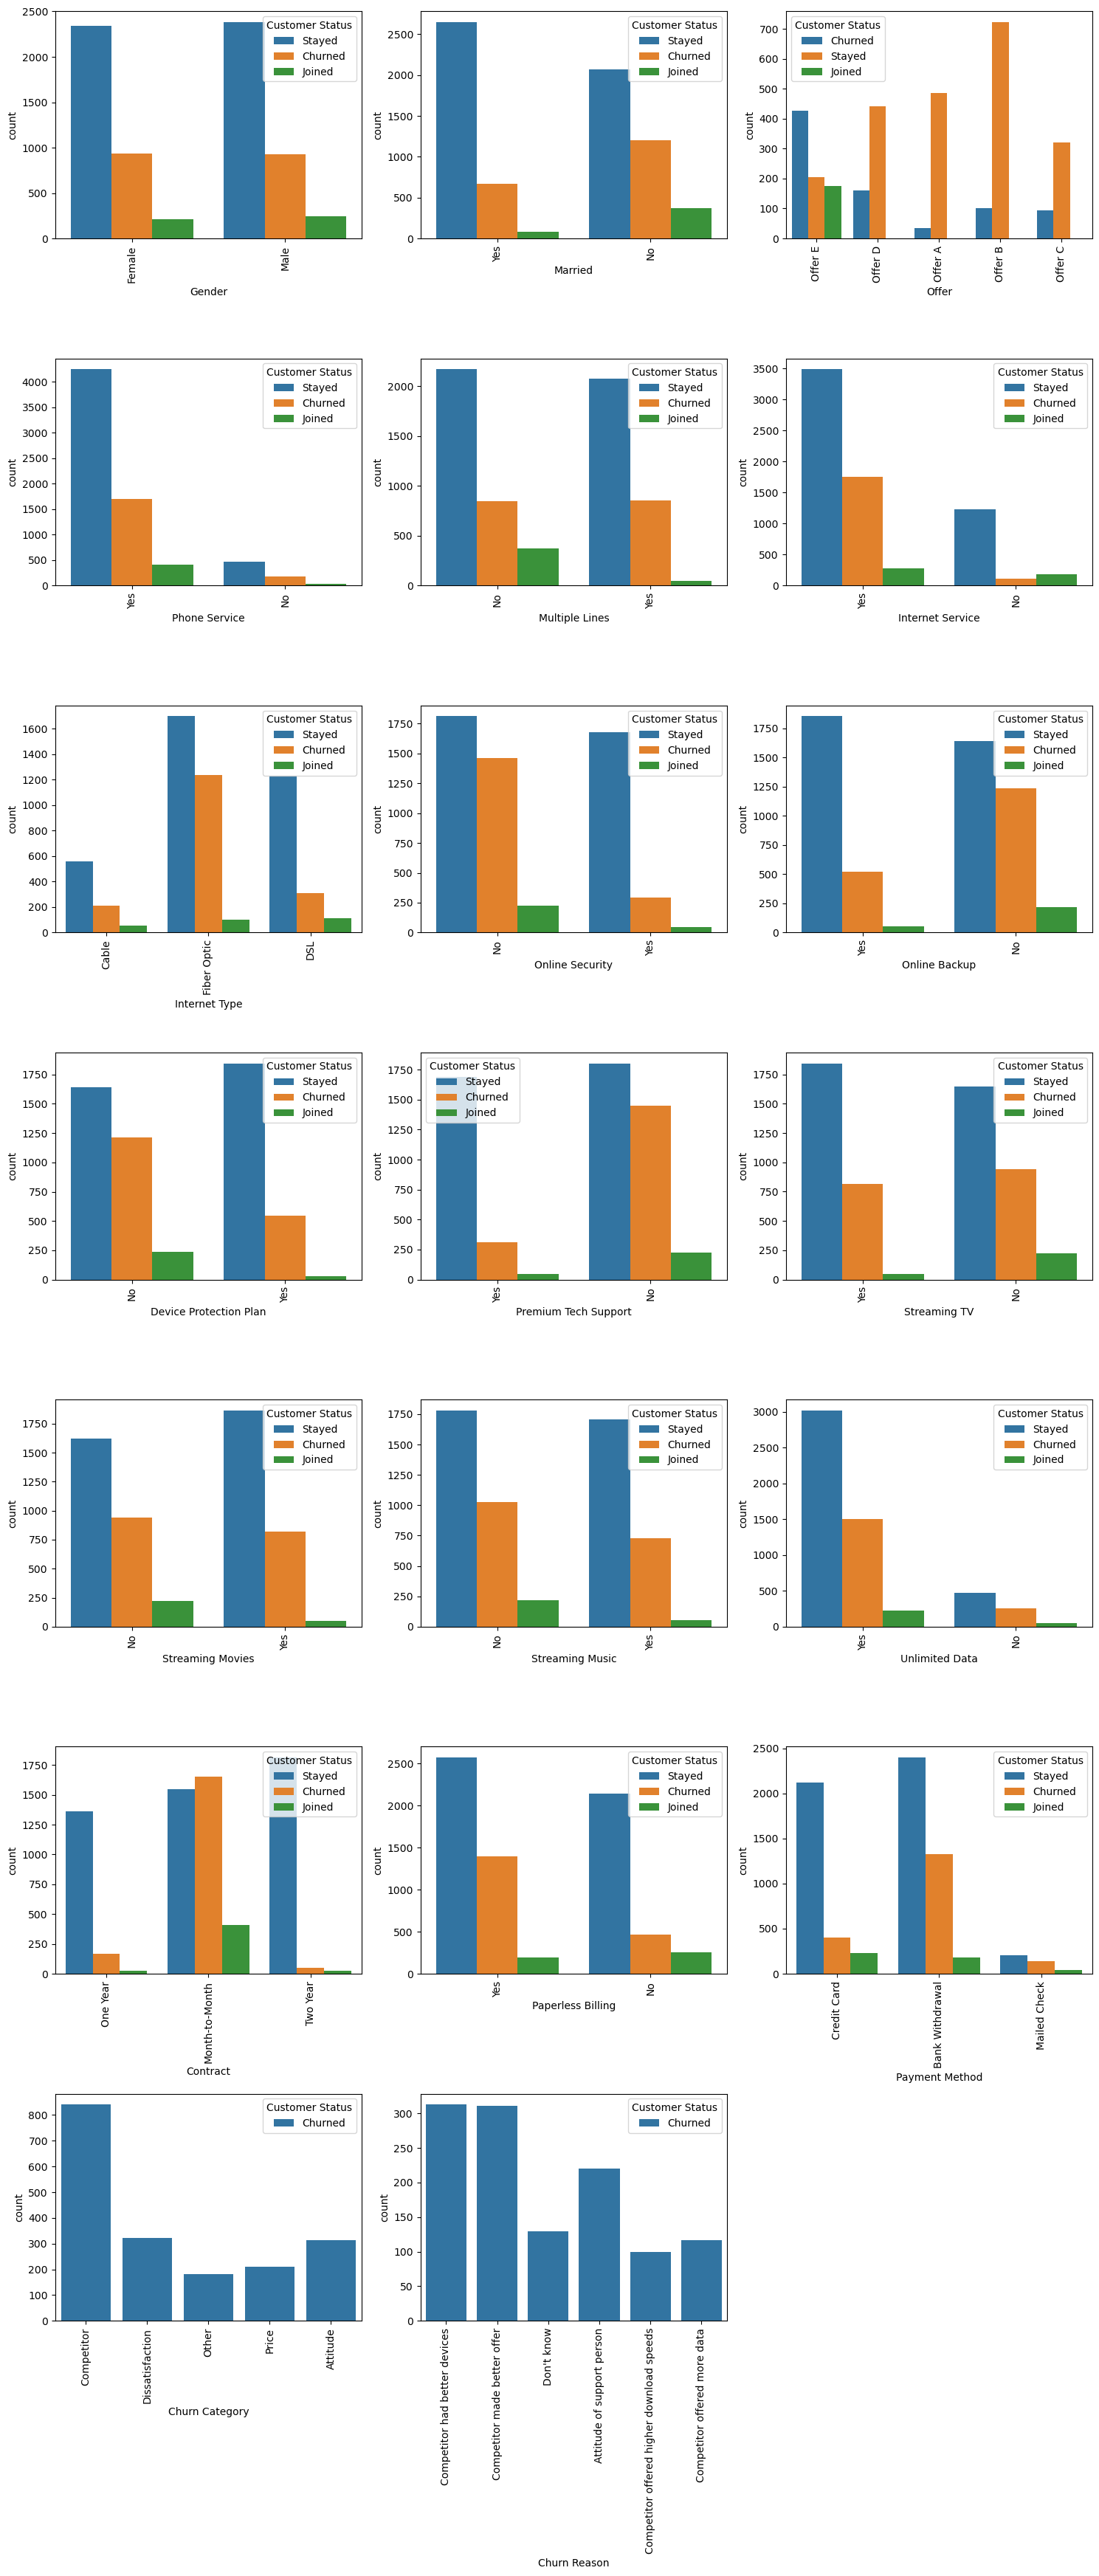

In [33]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Customer Status' in cat_vars:
    cat_vars.remove('Customer Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Customer Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

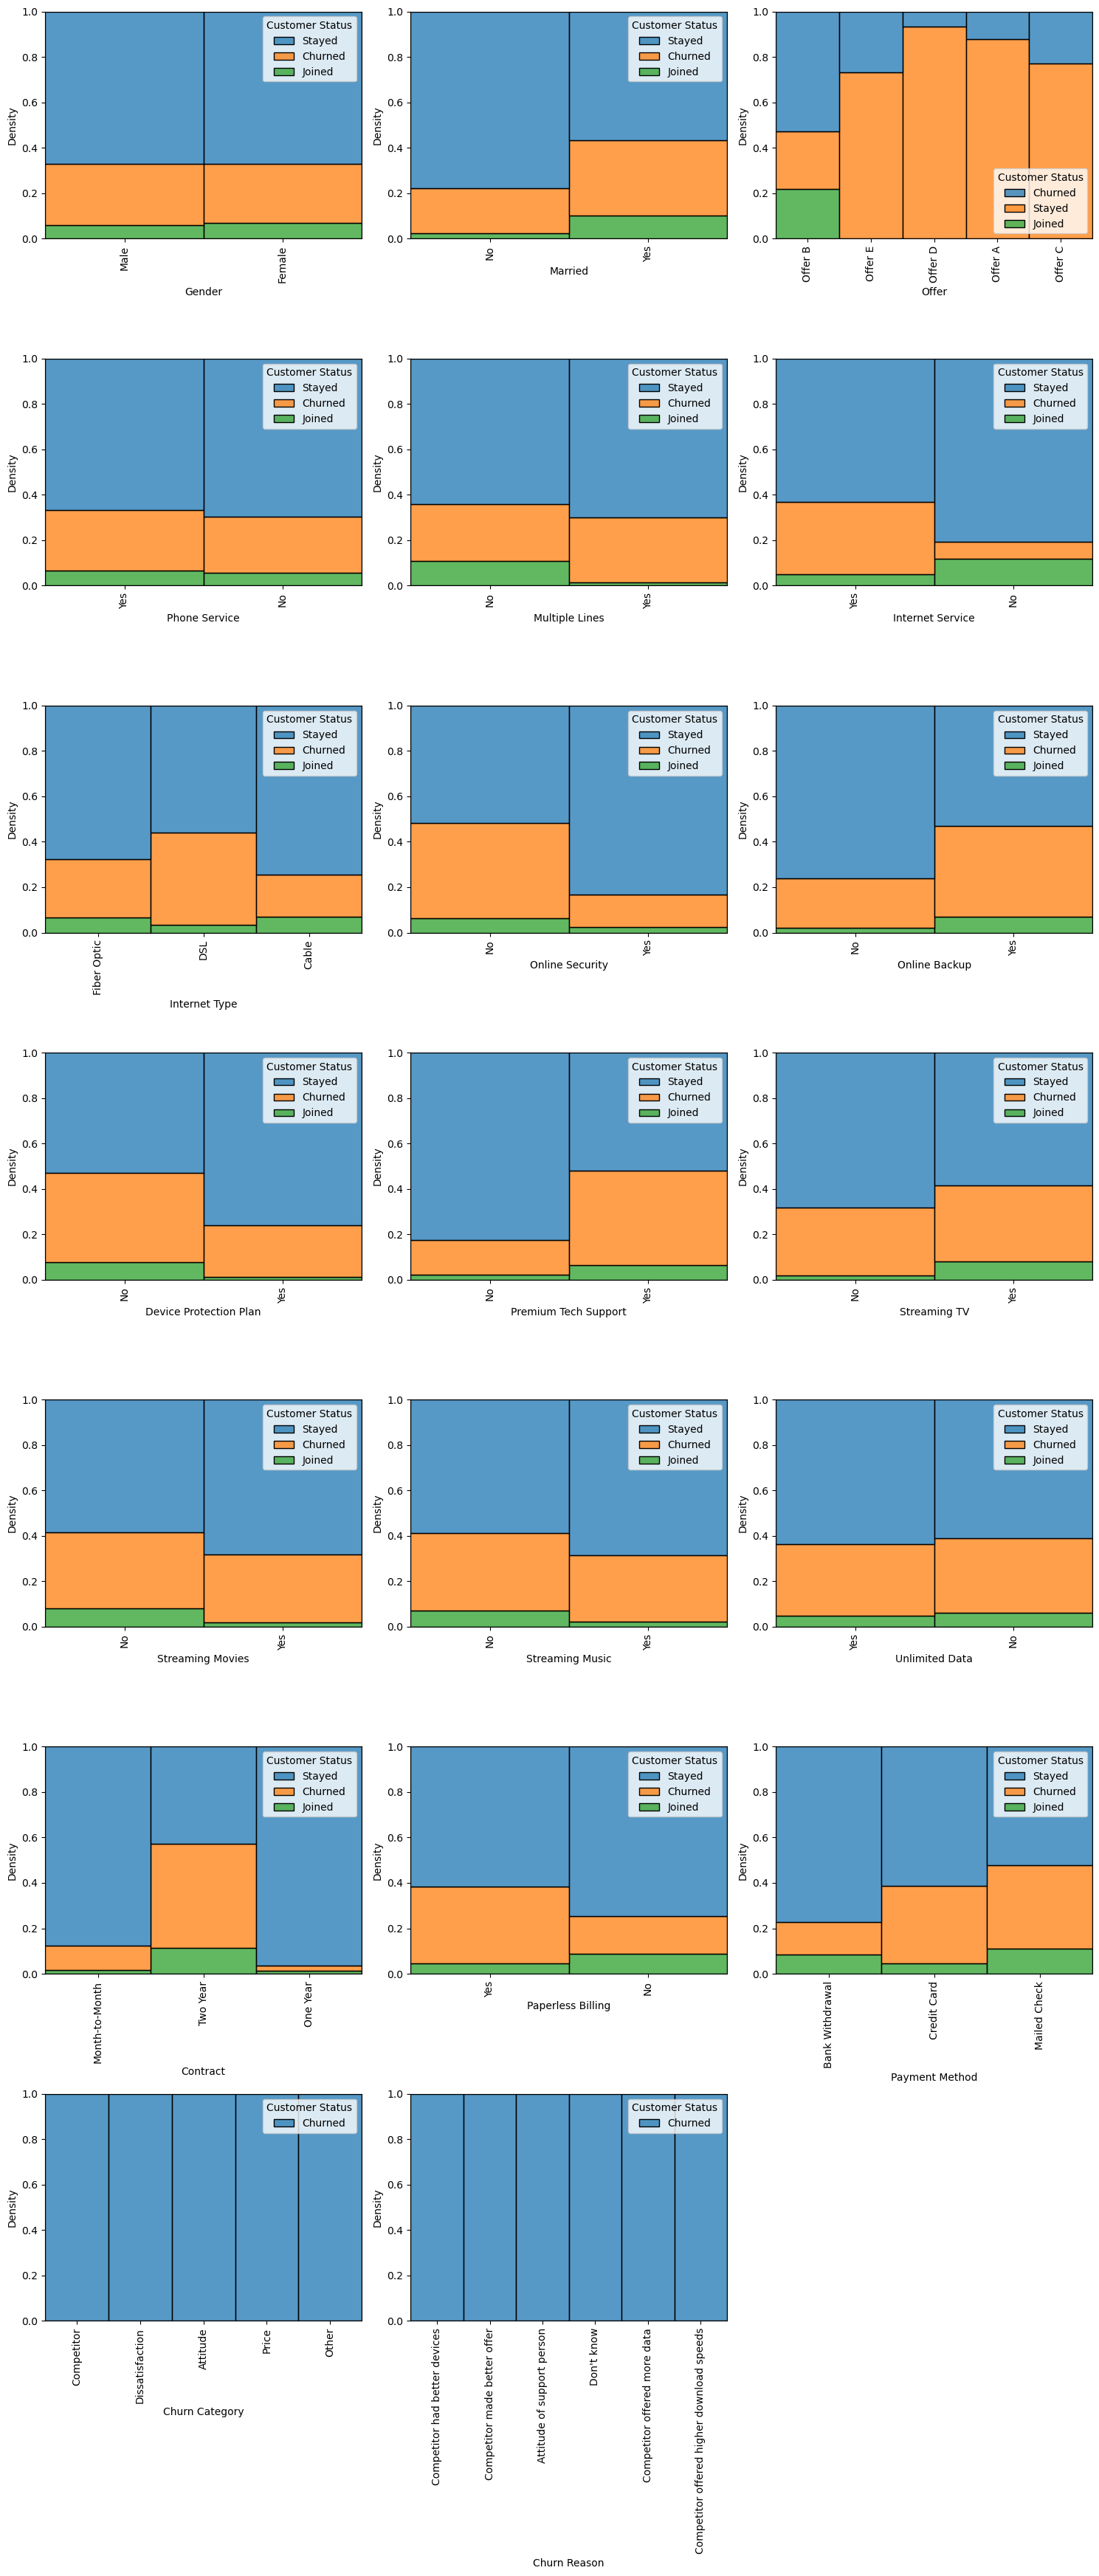

In [34]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Customer Status' in cat_vars:
    cat_vars.remove('Customer Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue='Customer Status', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

AttributeError: 'Series' object has no attribute 'append'

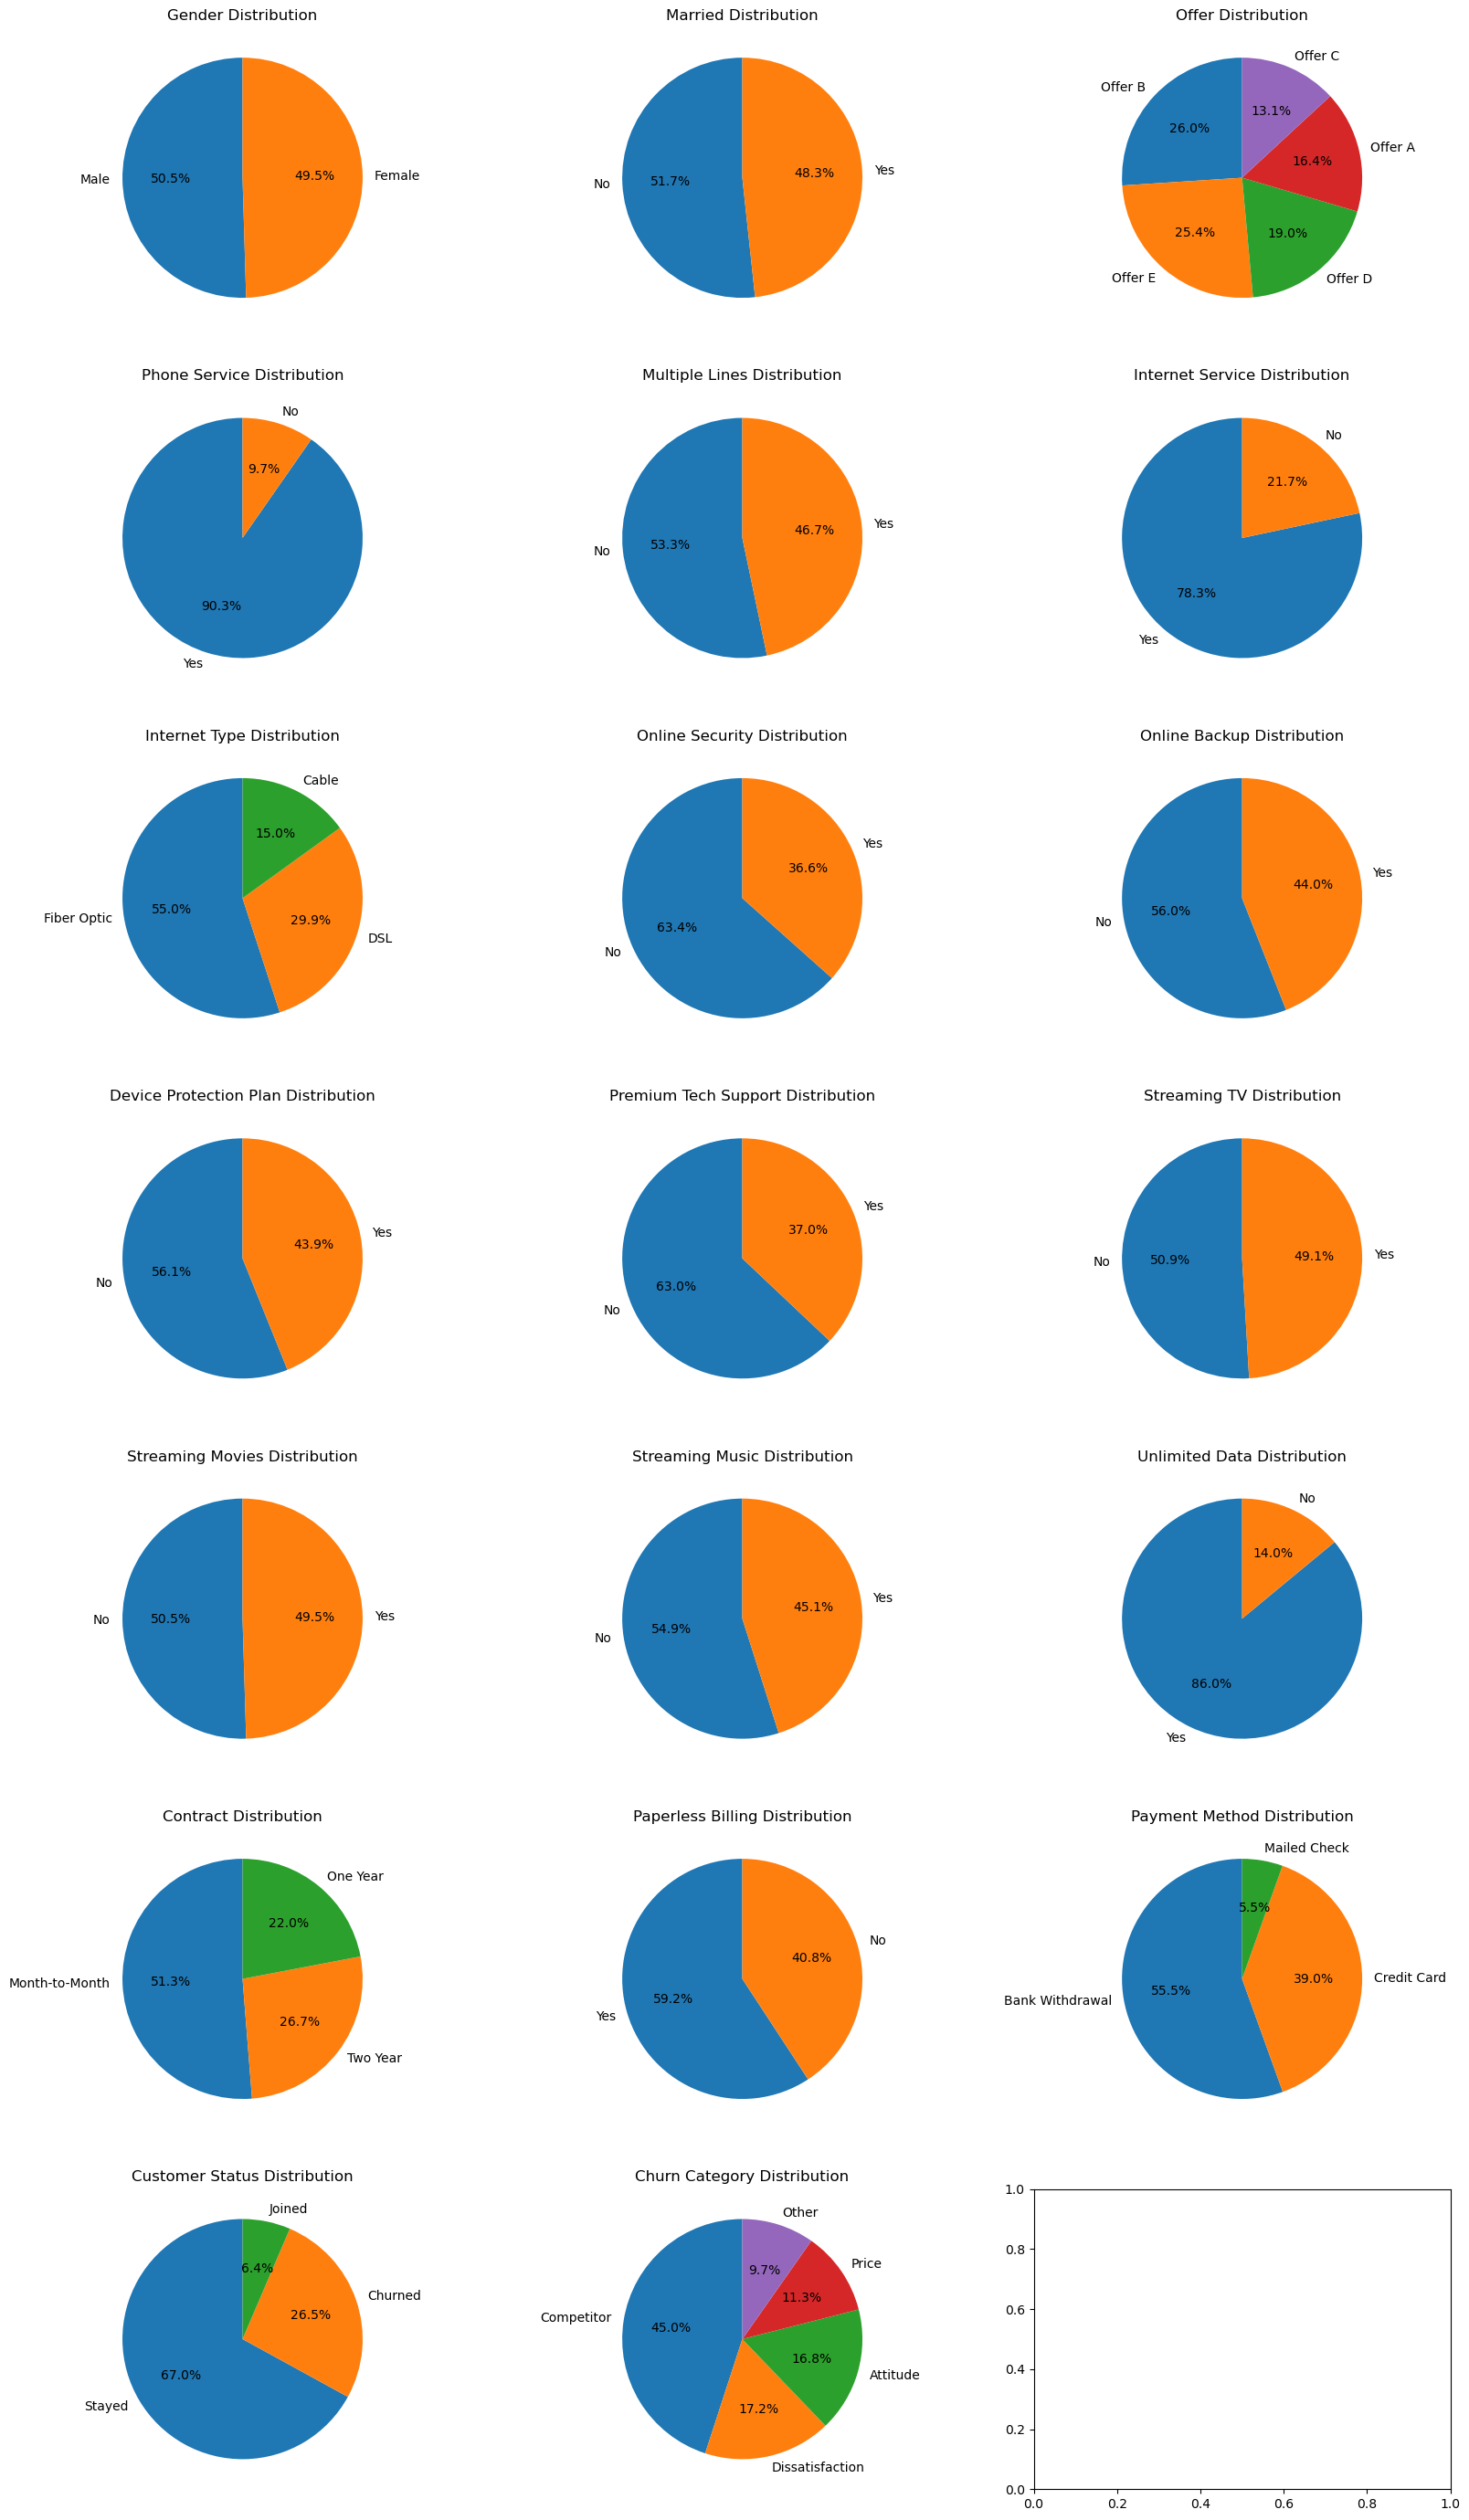

In [35]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Data Preprocessing Part 2

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

In [ ]:
# Drop column with missing value more than 25%
df.drop(columns = ['Churn Category', 'Churn Reason'], inplace=True)
df.shape

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

In [ ]:
# Drop column with 21% missing value because they are in the same user that have missing value
subset_columns = ['Internet Type', 'Avg Monthly GB Download',
                  'Online Security', 'Online Backup',
                  'Device Protection Plan', 'Premium Tech Support',
                  'Streaming TV', 'Streaming Movies',
                  'Streaming Music', 'Unlimited Data']
df.dropna(subset=subset_columns, inplace=True)

# I just drop the missing values
# If you want to impute you can impute

In [ ]:
df.shape

In [36]:
# Drop column with 9% missing value because they are in the same user that have missing value
subset_columns = ['Avg Monthly Long Distance Charges',
                  'Multiple Lines']
df.dropna(subset=subset_columns, inplace=True)

In [37]:
df.shape

(6361, 35)

In [38]:
# Check again the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Churn Category             73.290363
Churn Reason               73.290363
Offer                      54.928470
Internet Type              23.989939
Avg Monthly GB Download    23.989939
Online Security            23.989939
Online Backup              23.989939
Device Protection Plan     23.989939
Premium Tech Support       23.989939
Streaming TV               23.989939
Streaming Movies           23.989939
Streaming Music            23.989939
Unlimited Data             23.989939
dtype: float64

In [39]:
# Multi classification or Bi classifiacion
df['Customer Status'].value_counts()

Customer Status
Stayed     4246
Churned    1699
Joined      416
Name: count, dtype: int64

In [40]:
# Change Joined into stayed, so we can make binary classification
# Replace all values in the 'Customer Status' column with 'Stayed'
df['Customer Status'] = df['Customer Status'].replace('Joined', 'Stayed')
df['Customer Status'].value_counts()

Customer Status
Stayed     4662
Churned    1699
Name: count, dtype: int64

# Label Encoding for Object Datatypes

In [41]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Married: ['Yes' 'No']
Offer: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security: ['No' 'Yes' nan]
Online Backup: ['Yes' 'No' nan]
Device Protection Plan: ['No' 'Yes' nan]
Premium Tech Support: ['Yes' 'No' nan]
Streaming TV: ['Yes' 'No' nan]
Streaming Movies: ['No' 'Yes' nan]
Streaming Music: ['No' 'Yes' nan]
Unlimited Data: ['Yes' 'No' nan]
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned']
Churn Category: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Churn Reason: [nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services' "Don't know"
 'Long distance charges' 'Competitor made better offer'
 'Attitude of s

In [42]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Married: [1 0]
Offer: [5 4 3 0 1 2]
Phone Service: [0]
Multiple Lines: [0 1]
Internet Service: [1 0]
Internet Type: [0 2 1 3]
Online Security: [0 1 2]
Online Backup: [1 0 2]
Device Protection Plan: [0 1 2]
Premium Tech Support: [1 0 2]
Streaming TV: [1 0 2]
Streaming Movies: [0 1 2]
Streaming Music: [0 1 2]
Unlimited Data: [1 0 2]
Contract: [1 0 2]
Paperless Billing: [1 0]
Payment Method: [1 0 2]
Customer Status: [1 0]
Churn Category: [5 1 2 3 4 0]
Churn Reason: [20  2 18 14 11  7 12  3  1  4  0  9  5  6 13 19 17 10 15  8 16]


In [43]:
#Customer Status: ['Stayed' 'Churned']
#Customer Status: [1 0]

In [47]:
df.corr()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,37,1,0,34.827662,-118.999073,2,9,5,0,...,1,65.60,593.30,0.00,0,381.51,974.81,1,5,20
1,1,46,0,0,34.162515,-118.203869,0,9,5,0,...,1,-4.00,542.40,38.33,10,96.21,610.28,1,5,20
2,1,50,0,0,33.645672,-117.922613,0,4,4,0,...,0,73.90,280.85,0.00,0,134.60,415.45,0,1,2
3,1,78,1,0,38.014457,-122.115432,1,13,3,0,...,0,98.00,1237.85,0.00,0,361.66,1599.51,0,2,18
4,0,75,1,0,34.227846,-119.079903,3,3,5,0,...,1,83.90,267.40,0.00,0,22.14,289.54,0,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,36,0,0,33.362575,-117.299644,0,4,5,0,...,0,20.95,85.50,0.00,0,8.04,93.54,0,1,3
7038,0,20,0,0,32.759327,-116.997260,0,13,3,0,...,1,55.15,742.90,0.00,0,606.84,1349.74,1,5,20
7039,1,40,1,0,37.734971,-120.954271,1,22,3,0,...,0,85.10,1873.70,0.00,0,356.40,2230.10,0,2,18
7040,1,22,0,0,39.108252,-123.645121,0,2,4,0,...,1,50.30,92.75,0.00,0,37.24,129.99,1,5,20


<Axes: >

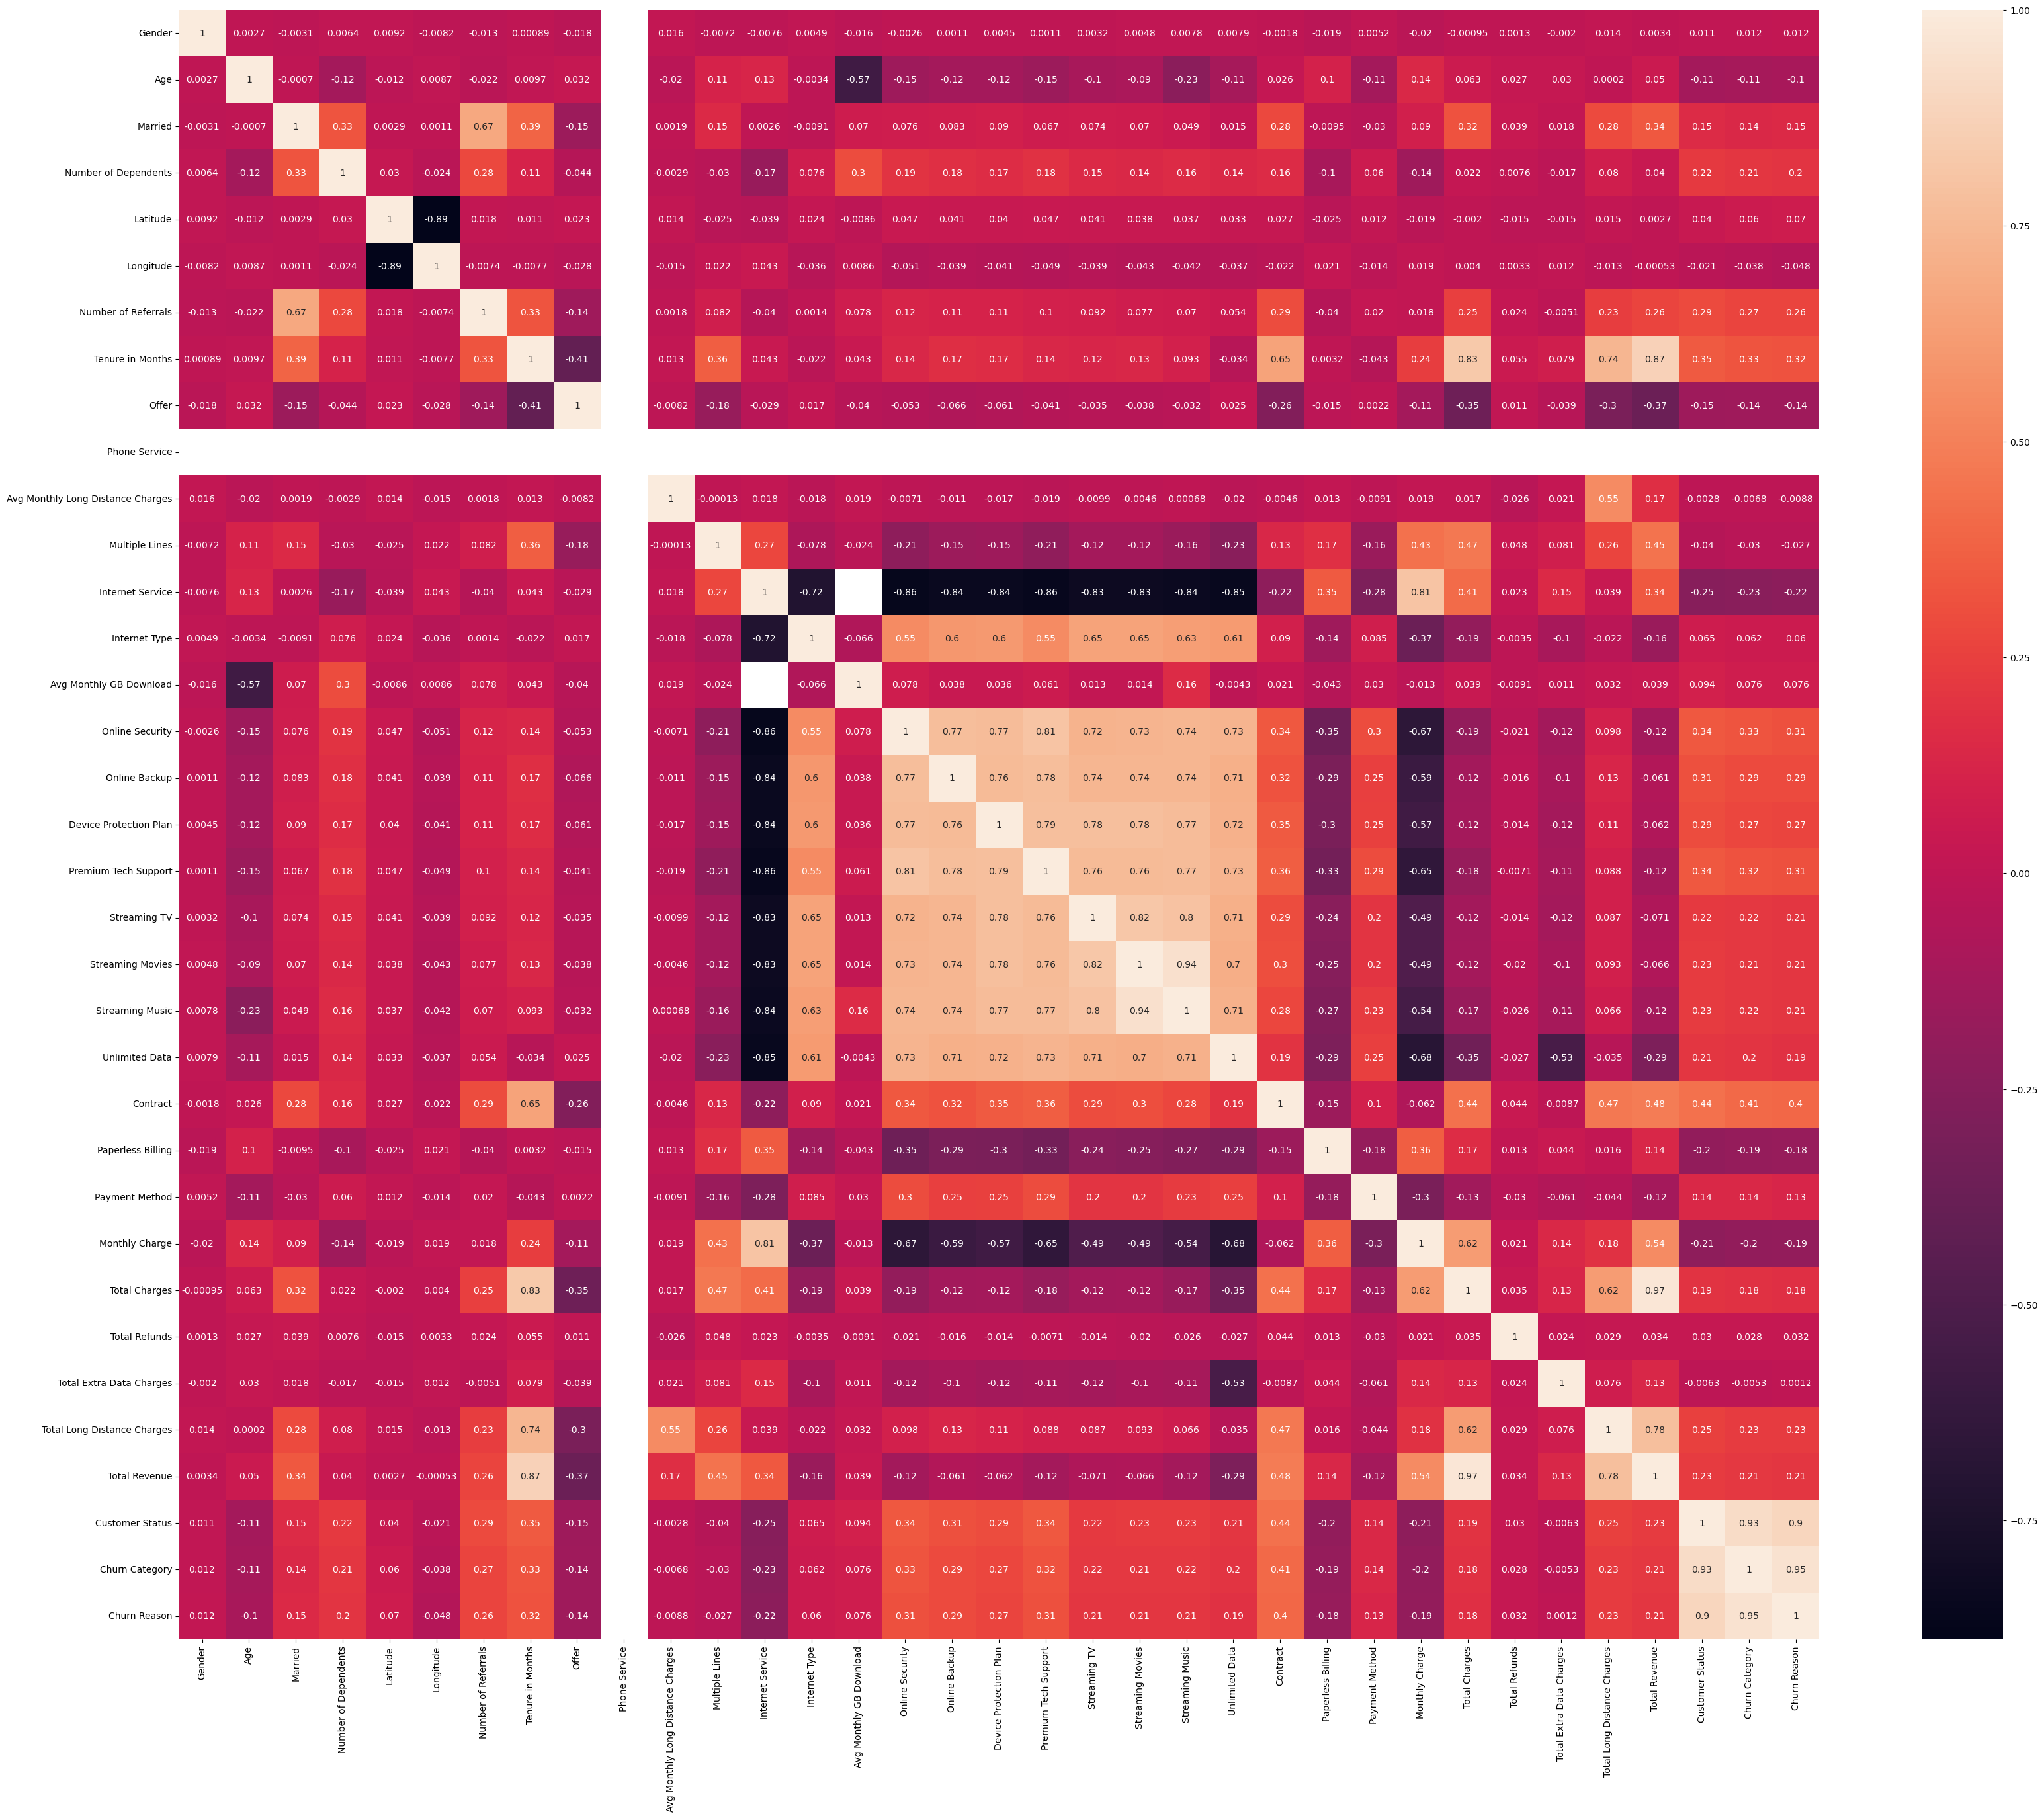

In [44]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [33]:
# Remove Internet Service and Phone Service column because of zero correlation
df.drop(columns = ['Internet Service', 'Phone Service'], inplace=True)
df.shape

(4835, 31)

In [48]:
df.to_csv("Preprocessed_data.csv")

In [49]:
# this is your job
# eda ====== all numerical data

In [50]:
pd.read_csv('Preprocessed_data.csv')

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,0,37,1,0,34.827662,-118.999073,2,9,5,...,1,65.60,593.30,0.00,0,381.51,974.81,1,5,20
1,1,1,46,0,0,34.162515,-118.203869,0,9,5,...,1,-4.00,542.40,38.33,10,96.21,610.28,1,5,20
2,2,1,50,0,0,33.645672,-117.922613,0,4,4,...,0,73.90,280.85,0.00,0,134.60,415.45,0,1,2
3,3,1,78,1,0,38.014457,-122.115432,1,13,3,...,0,98.00,1237.85,0.00,0,361.66,1599.51,0,2,18
4,4,0,75,1,0,34.227846,-119.079903,3,3,5,...,1,83.90,267.40,0.00,0,22.14,289.54,0,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,7037,0,36,0,0,33.362575,-117.299644,0,4,5,...,0,20.95,85.50,0.00,0,8.04,93.54,0,1,3
6357,7038,0,20,0,0,32.759327,-116.997260,0,13,3,...,1,55.15,742.90,0.00,0,606.84,1349.74,1,5,20
6358,7039,1,40,1,0,37.734971,-120.954271,1,22,3,...,0,85.10,1873.70,0.00,0,356.40,2230.10,0,2,18
6359,7040,1,22,0,0,39.108252,-123.645121,0,2,4,...,1,50.30,92.75,0.00,0,37.24,129.99,1,5,20


In [35]:
# Decision tree fitting is done
# Model is developed
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

$Step-2$: **Predictions**

In [36]:
X_test.shape

(967, 30)

In [37]:
# For predictions need to pass X_test
y_pred_dt=dtree.predict(X_test)
y_pred_dt

#Customer Status: ['Stayed' 'Churned']
#Customer Status: [1 0]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

$Step-3$: **Metrics**

In [38]:
# Metrics calculate by using actual y_test and y_predictions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

accuray is: 75.7
F1 is: 0.82
Precision is: 0.83
Recall is: 0.81


In [39]:
print(classification_report(y_test,y_pred_dt))

# Out of 967 = 602(1) + 305 (0)
# P= TP/TP+FP ===== > 0.83
# R= TP/TP+FN ==== > 0.81

# pls concentrae only on TPs

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       305
           1       0.83      0.81      0.82       662

    accuracy                           0.76       967
   macro avg       0.72      0.73      0.72       967
weighted avg       0.76      0.76      0.76       967



**what is Macro avg and what is Weighted avg?**

**Confusion-matrix**

In [40]:
from sklearn.metrics import confusion_matrix
cmt=confusion_matrix(y_test,y_pred_dt)
cmt

array([[197, 108],
       [127, 535]], dtype=int64)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

# Python code and thery concpet the matrix is different 
# pls keep this in mind

True negative: 197
False postive: 108
False negative: 127
True postive: 535


In [ ]:
#2e+02

<Axes: >

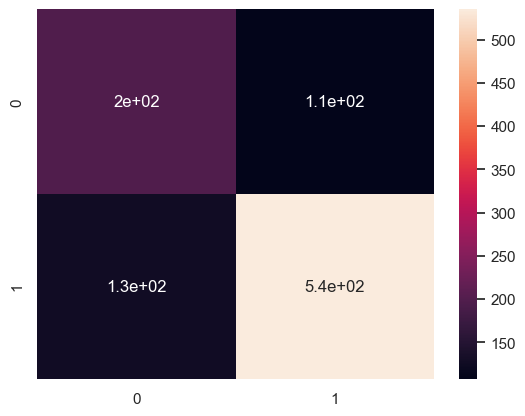

In [42]:
sns.heatmap(cmt,annot=True)


**ROC-AUC curve**

- Consider there are two classes are there
- for every observations it will give probabilities
- Whcih ever is the highest probability that class will be the output

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/220px-Roc_curve.svg.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb pT0Scc KAlRDb" alt="Receiver operating characteristic - Wikipedia" data-noaft="1" style="width: 220px; height: 220px; margin: 0px;">

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
probs=dtree.predict_proba(X_test)  

# Predict will give all the answers
# predict_prob ==== both labels probability

In [44]:
probs[2]
# what is the max value=1

array([1., 0.])

In [45]:
np.argmax(probs[2])

# Third test sample i.e. ID=2
# Maximum probability is for class zero

0

In [46]:
prob_data=pd.DataFrame(probs,columns=['Churned','Stayed'])
prob_data.head(10)

,Churned,Stayed
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [47]:
dtree.predict_proba(X_test)[:,1]  

# Only class-1 probabilities

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0.

- Every metric 

       y_test(y_actual)  vs    y_predictions

- ROC-AUC       

       y_test            vs    y_prediction_probabilities (only class-1 probs)

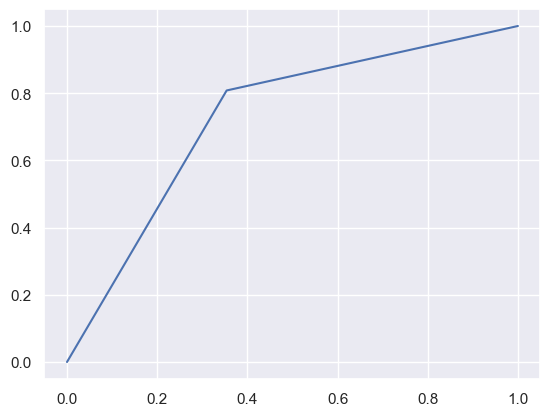

In [48]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [ ]:
df.shape

accuray is: 75.7
F1 is: 0.82
Precision is: 0.84
Recall is: 0.8


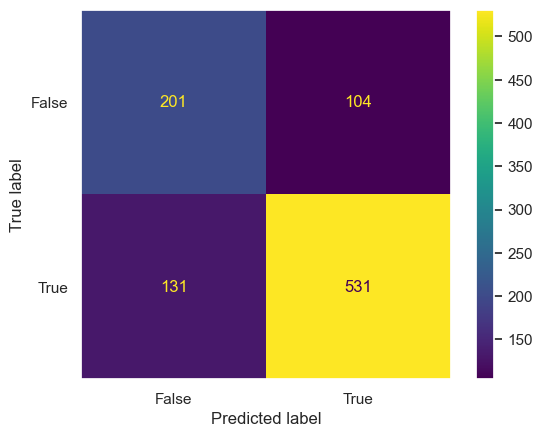

True negative: 201
False postive: 104
False negative: 131
True postive: 531


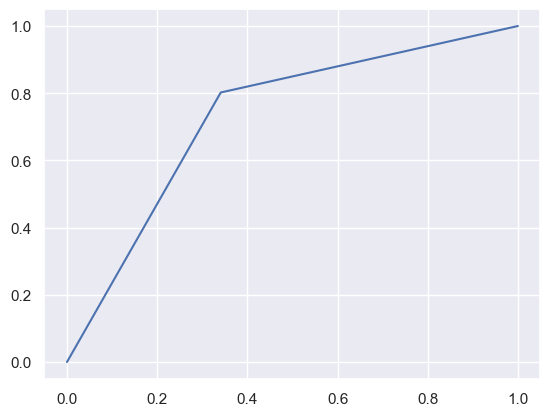

In [49]:
### All together
# =======================Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [ ]:
y_pred_dt[:5]


# Every ML algorithm will provide praobaility first
# Output has two labels :  Stayed  Churnder
# For evert test case ======== two probabilities
# Whcih ever is the highest probability ======= answer
# passing first test case ========= [p(churned)=0,p(stayed)=1]====>                          [Output:stayed ====== > 1]

# Third test case ================ [P(churned)=1., P(stayed)=0.]====Hihest=p(churned)=1 =====[output:churned ==== 0]

### Logistic Regression

**With out Hyper parameter Tuning**

C:\Users\omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuray is: 77.77
F1 is: 0.84
Precision is: 0.82
Recall is: 0.86


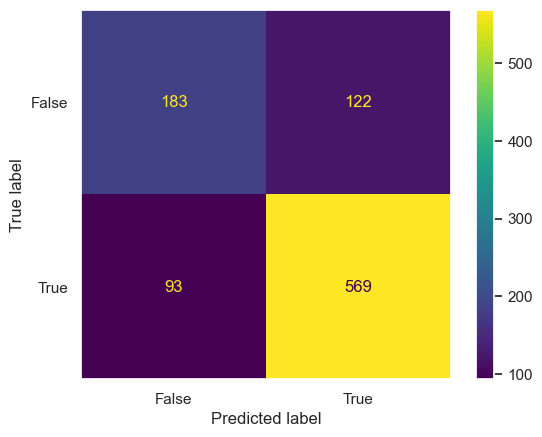

True negative: 183
False postive: 122
False negative: 93
True postive: 569


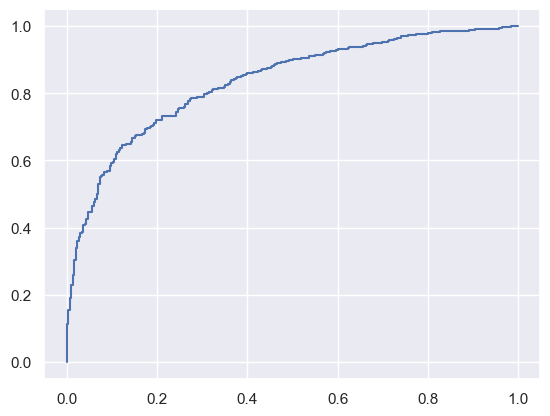

In [51]:

### All together
# ======================= Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_log=logtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Naive Bayes

**With out hyperaparameter tuning**

accuray is: 75.18
F1 is: 0.8
Precision is: 0.87
Recall is: 0.75


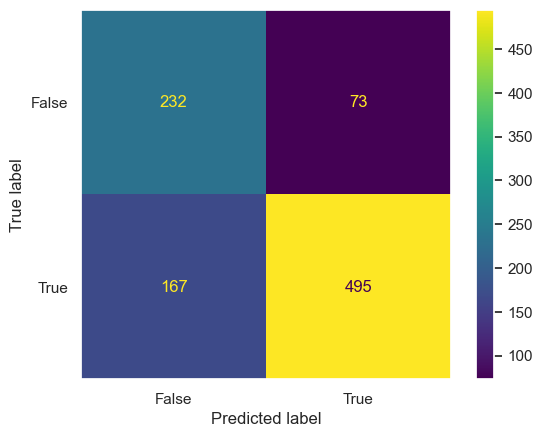

True negative: 232
False postive: 73
False negative: 167
True postive: 495


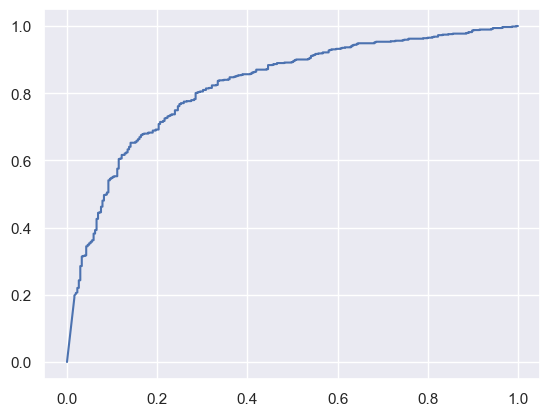

In [52]:
### All together
# ======================= Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_NB=NBtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### KNN

**With out hyperparameter tuning**

accuray is: 73.73
F1 is: 0.81
Precision is: 0.79
Recall is: 0.84


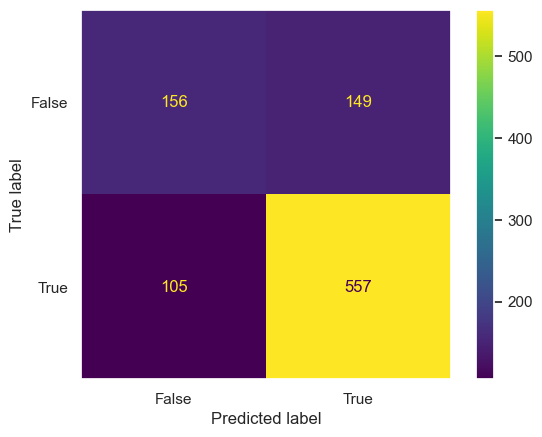

True negative: 156
False postive: 149
False negative: 105
True postive: 557


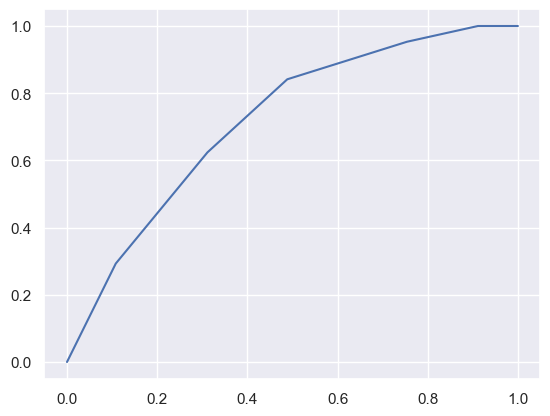

In [53]:
### All together
# ======================= Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_KNN=KNNtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Random Forest

**With out hyper pramater tuning**

accuray is: 82.94
F1 is: 0.88
Precision is: 0.85
Recall is: 0.9


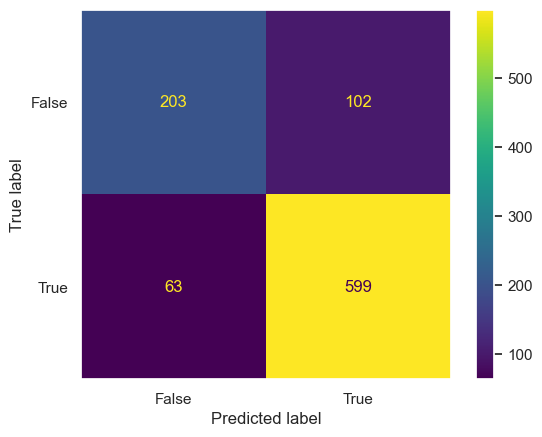

True negative: 203
False postive: 102
False negative: 63
True postive: 599


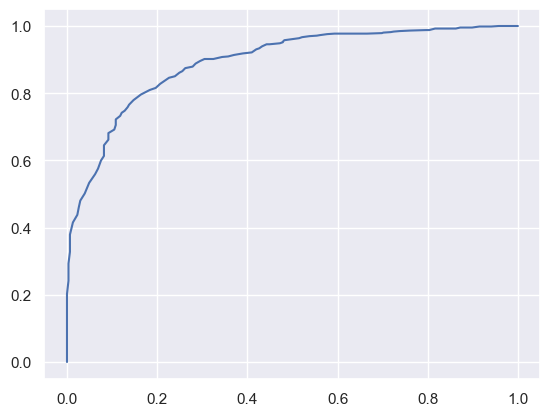

In [54]:
### All together
# ======================= Step-1:  divide data into input and target=====================================


X = df.drop('Customer Status', axis=1)
y = df['Customer Status']


# ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# ========================Step-3: Outlier analysis based on z-score========================================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ===============================Step-4:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


In [58]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

# Yu can add Confusion matrix details
# Based on f1-score model is good 
# P and R on f1-score
# Tp,fp,tn,fn ====== P and R


# For binary classification ====== sigmoid (DL)  works well

,Accuracy,Precision,Recall,F1-score
DT,75.70,0.84,0.80,0.82
KNN,73.73,0.79,0.84,0.81
Logistic,77.77,0.82,0.86,0.84
Naive Bayes,75.18,0.87,0.75,0.80
Random Forest,82.94,0.85,0.90,0.88


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features=None, n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100)
xgb.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()